# 数据挖掘实践任务

## 任务描述

<b>说明：</b>对数据集(非原始数据，已经处理过了)进行探索和分析，预测贷款用户是否会逾期,表格中 "status" 是结果标签：0表示未逾期，1表示逾期

<b>要求：</b>数据切分方式 - 三七分，其中测试集30%，训练集70%，随机种子设置为2018

<b>任务：</b>对数据进行探索和分析。时间：2天
- 数据类型的分析
- 无关特征删除
- 数据类型转换
- 缺失值处理
- ……以及你能想到和借鉴的数据分析处理

# 任务实施

## 数据类型分析

### 加载数据

In [1]:
import pandas as pd
data = pd.read_csv('./dataset/data.csv',encoding='gbk')

### 查看数据前5行

In [2]:
data.head(10)

,Unnamed: 0,custid,trade_no,bank_card_no,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,...,loans_max_limit,loans_avg_limit,consfin_credit_limit,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day
0,5,2791858,20180507115231274000000023057383,卡号1,0.01,0.99,0,0.90,0.55,0.313,...,2900.0,1688.0,1200.0,75.0,1.0,2.0,1200.0,1200.0,12.0,18.0
1,10,534047,20180507121002192000000023073000,卡号1,0.02,0.94,2000,1.28,1.00,0.458,...,3500.0,1758.0,15100.0,80.0,5.0,6.0,22800.0,9360.0,4.0,2.0
2,12,2849787,20180507125159718000000023114911,卡号1,0.04,0.96,0,1.00,1.00,0.114,...,1600.0,1250.0,4200.0,87.0,1.0,1.0,4200.0,4200.0,2.0,6.0
3,13,1809708,20180507121358683000000388283484,卡号1,0.00,0.96,2000,0.13,0.57,0.777,...,3200.0,1541.0,16300.0,80.0,5.0,5.0,30000.0,12180.0,2.0,4.0
4,14,2499829,20180507115448545000000388205844,卡号1,0.01,0.99,0,0.46,1.00,0.175,...,2300.0,1630.0,8300.0,79.0,2.0,2.0,8400.0,8250.0,22.0,120.0
5,15,518072,20180507121233054000000388275132,卡号1,0.02,0.98,2000,7.59,1.00,0.733,...,5300.0,1941.0,11200.0,80.0,10.0,12.0,20400.0,8130.0,3.0,4.0
6,16,1205125,20180507121931540000000388298915,卡号1,0.02,0.98,0,23.67,0.94,0.087,...,2200.0,2200.0,7600.0,73.0,2.0,2.0,16800.0,8900.0,1.0,3.0
7,18,1129897,20180507124659235000000023105807,卡号1,0.02,0.98,0,0.25,0.88,0.302,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,20,2599411,20180507115855621000000388224458,卡号1,0.03,0.65,0,0.31,0.76,0.472,...,5300.0,4750.0,5500.0,79.0,8.0,11.0,19200.0,7987.0,24.0,7.0
9,26,1413051,20180504155156296000000021138084,卡号1,0.01,0.99,500,0.80,1.00,0.088,...,2800.0,1520.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,142.0


### 查看数据集属性

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4754 entries, 0 to 4753
Data columns (total 90 columns):
Unnamed: 0                                    4754 non-null int64
custid                                        4754 non-null int64
trade_no                                      4754 non-null object
bank_card_no                                  4754 non-null object
low_volume_percent                            4752 non-null float64
middle_volume_percent                         4752 non-null float64
take_amount_in_later_12_month_highest         4754 non-null int64
trans_amount_increase_rate_lately             4751 non-null float64
trans_activity_month                          4752 non-null float64
trans_activity_day                            4752 non-null float64
transd_mcc                                    4752 non-null float64
trans_days_interval_filter                    4746 non-null float64
trans_days_interval                           4752 non-null float64
regional_mobility

In [4]:
# 查看数据类型及对应类型个数
print(data.dtypes.value_counts())

float64    70
int64      13
object      7
dtype: int64


### 查看数据集描述性统计

In [5]:
data.describe()

,Unnamed: 0,custid,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,transd_mcc,trans_days_interval_filter,...,loans_max_limit,loans_avg_limit,consfin_credit_limit,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day
count,4754.000000,4.754000e+03,4752.000000,4752.000000,4754.000000,4751.000000,4752.000000,4752.000000,4752.000000,4746.000000,...,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4450.000000,4457.000000
mean,6008.414178,1.690993e+06,0.021806,0.901294,1940.197728,14.160674,0.804411,0.365425,17.502946,29.029920,...,3390.038142,1820.357864,9187.009199,76.042630,4.732331,5.227507,16153.690823,8007.696881,24.112809,55.181512
std,3452.071428,1.034235e+06,0.041527,0.144856,3923.971494,694.180473,0.196920,0.170196,4.475616,22.722432,...,1474.206546,583.418291,7371.257043,14.536819,2.974596,3.409292,14301.037628,5679.418585,37.725724,53.486408
min,5.000000,1.140000e+02,0.000000,0.000000,0.000000,0.000000,0.120000,0.033000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.000000,-2.000000
25%,3106.000000,7.593358e+05,0.010000,0.880000,0.000000,0.615000,0.670000,0.233000,15.000000,16.000000,...,2300.000000,1535.000000,4800.000000,77.000000,2.000000,3.000000,7800.000000,4737.000000,5.000000,10.000000
50%,6006.500000,1.634942e+06,0.010000,0.960000,500.000000,0.970000,0.860000,0.350000,17.000000,23.000000,...,3100.000000,1810.000000,7700.000000,79.000000,4.000000,5.000000,13800.000000,7050.000000,14.000000,36.000000
75%,8999.000000,2.597905e+06,0.020000,0.990000,2000.000000,1.600000,1.000000,0.480000,20.000000,32.000000,...,4300.000000,2100.000000,11700.000000,80.000000,7.000000,7.000000,20400.000000,10000.000000,24.000000,91.000000
max,11992.000000,4.004694e+06,1.000000,1.000000,68000.000000,47596.740000,1.000000,0.941000,42.000000,285.000000,...,10000.000000,6900.000000,87100.000000,87.000000,18.000000,20.000000,266400.000000,82800.000000,360.000000,323.000000


### 查看每个特征的属性值分布情况

In [6]:
# for col in data.columns:
#     print('{}:{}\r\n'.format(col,data[col].value_counts()))

<b>通过上述代码结果分析发现:</b>
- 无关特征：Unnamed: 0、custid、trade_no、bank_card_no、id_name
- 特殊特征：student_feature、reg_preference_for_trad、source
- 日期特征：latest_query_time、loans_latest_time

In [7]:
# 打印以上特征属性值分布情况
special_features = ['Unnamed: 0','custid','trade_no','bank_card_no','id_name',
                    'student_feature','reg_preference_for_trad','source','latest_query_time','loans_latest_time']
for col in special_features:
    print('{}:{}\r\n'.format(col,data[col].value_counts()))

Unnamed: 0:2047    1
6774    1
8825    1
637     1
4735    1
       ..
7445    1
1302    1
3355    1
7453    1
8192    1
Name: Unnamed: 0, Length: 4754, dtype: int64

custid:284669     1
1077931    1
309934     1
1045167    1
139340     1
          ..
2927975    1
628072     1
3417450    1
814443     1
1009665    1
Name: custid, Length: 4754, dtype: int64

trade_no:20180504174023484000000381700917    1
20180507122513359000000023087311    1
20180507122859734000000023090305    1
20180507120456603000000023068772    1
20180507115854636000000388222574    1
                                   ..
20180507122456943000000388326752    1
20180507123241837000000388356039    1
20180507114935479000000388191116    1
20180507121639391000000388288832    1
20180507122620557000000388332851    1
Name: trade_no, Length: 4754, dtype: int64

bank_card_no:卡号1    4754
Name: bank_card_no, dtype: int64

id_name:张龙     5
李杰     5
李明     5
李波     4
张伟     4
      ..
刘圣冬    1
王聪     1
李春洪    1
时永新    1
郑波波    1
Name

### 初步结论

(1) 数据集共有4754个样本,特征维度为90,其中float64类型70个,int64类型13个,object类型7个

(2) 通过info发现，数据集除了'student_feature'存在大量缺失值外，在整体表现是相当完整

(3) 大部分特征数据方差很大，存在拖尾现象

(4) 初步分析得到的无关特征有['Unnamed: 0','custid','trade_no','bank_card_no','id_name','student_feature']、需要进行类型转换的特征有：['reg_preference_for_trad']、日期特征有：['source','latest_query_time','loans_latest_time']
                  
    后续还需要通过寻找特征相关性和特征组合对特征进行进行选择和提取

## 无关特征删除

对上述分析得到的无关特征['Unnamed: 0','custid','trade_no','bank_card_no','id_name','student_feature']+日期特征进行删除

In [8]:
drop_features = ['Unnamed: 0','custid','trade_no','bank_card_no','id_name',
                    'student_feature','source','latest_query_time','loans_latest_time']
data_del_useless = data.drop(drop_features,axis=1)
print(data_del_useless.dtypes.value_counts())

float64    69
int64      11
object      1
dtype: int64


## 数据类型转换

将城市等级：'reg_preference_for_trad'进行类型转换

In [9]:
# 查看'reg_preference_for_trad'的所有属性值
data_del_useless['reg_preference_for_trad'].value_counts()

一线城市    3403
三线城市    1064
境外       150
二线城市     131
其他城市       4
Name: reg_preference_for_trad, dtype: int64

In [15]:
for i in range(0, data.shape[0]):
    if data_del_useless.reg_preference_for_trad[i] == '一线城市':
        data_del_useless.reg_preference_for_trad[i] = 1
    elif data_del_useless.reg_preference_for_trad[i] == '二线城市':
        data_del_useless.reg_preference_for_trad[i] = 2
    elif data_del_useless.reg_preference_for_trad[i] == '三线城市':
        data_del_useless.reg_preference_for_trad[i] = 3
    elif data_del_useless.reg_preference_for_trad[i] == '境外':
        data_del_useless.reg_preference_for_trad[i] = 4
    elif data_del_useless.reg_preference_for_trad[i] == '其他城市':
        data_del_useless.reg_preference_for_trad[i] = 5
data_trans = data_del_useless.apply(pd.to_numeric, errors="ignore")
print(data_trans['reg_preference_for_trad'].value_counts())
print(data_trans.dtypes.value_counts())

1.0    3403
3.0    1064
4.0     150
2.0     131
5.0       4
Name: reg_preference_for_trad, dtype: int64
float64    70
int64      11
dtype: int64


## 缺失值处理

(1) 删除缺失值超过30的行或列

(2) 将缺失值用每列的mean代替

In [111]:
# 删除缺失值超过30%的行
data_procna = data_trans.dropna(axis=0,thresh=data_trans.shape[1]*0.7) 
# 删除缺失值超过30%的列
data_procna = data_procna.dropna(axis=1,thresh=data_trans.shape[0]*0.7) 
# 使用均值替换缺失值
data_procna = data_procna.fillna(data_procna.mean())

In [112]:
data_procna

,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,transd_mcc,trans_days_interval_filter,trans_days_interval,regional_mobility,...,loans_max_limit,loans_avg_limit,consfin_credit_limit,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day
0,0.01,0.99,0,0.90,0.55,0.313,17.0,27.0,26.0,3.0,...,2900.0,1688.0,1200.0,75.0,1.0,2.0,1200.0,1200.0,12.000000,18.0
1,0.02,0.94,2000,1.28,1.00,0.458,19.0,30.0,14.0,4.0,...,3500.0,1758.0,15100.0,80.0,5.0,6.0,22800.0,9360.0,4.000000,2.0
2,0.04,0.96,0,1.00,1.00,0.114,13.0,68.0,22.0,1.0,...,1600.0,1250.0,4200.0,87.0,1.0,1.0,4200.0,4200.0,2.000000,6.0
3,0.00,0.96,2000,0.13,0.57,0.777,22.0,14.0,6.0,3.0,...,3200.0,1541.0,16300.0,80.0,5.0,5.0,30000.0,12180.0,2.000000,4.0
4,0.01,0.99,0,0.46,1.00,0.175,13.0,66.0,42.0,1.0,...,2300.0,1630.0,8300.0,79.0,2.0,2.0,8400.0,8250.0,22.000000,120.0
5,0.02,0.98,2000,7.59,1.00,0.733,27.0,8.0,11.0,3.0,...,5300.0,1941.0,11200.0,80.0,10.0,12.0,20400.0,8130.0,3.000000,4.0
6,0.02,0.98,0,23.67,0.94,0.087,10.0,54.0,53.0,2.0,...,2200.0,2200.0,7600.0,73.0,2.0,2.0,16800.0,8900.0,1.000000,3.0
8,0.03,0.65,0,0.31,0.76,0.472,15.0,21.0,14.0,2.0,...,5300.0,4750.0,5500.0,79.0,8.0,11.0,19200.0,7987.0,24.000000,7.0
9,0.01,0.99,500,0.80,1.00,0.088,15.0,36.0,35.0,2.0,...,2800.0,1520.0,0.0,0.0,0.0,0.0,0.0,0.0,18.000000,142.0
10,0.01,0.99,0,2.48,0.94,0.322,16.0,29.0,21.0,2.0,...,1800.0,1325.0,9900.0,80.0,7.0,8.0,20400.0,7757.0,12.000000,9.0


## 异常值处理

(1) 标准差上下三倍绝对中位差之间属于正常点

(2) 平均值上下三倍标准差之间属于正常点

(3) 箱型图提供了一个识别异常值的标准，即大于或小于箱型图设定的上下界的数值即为异常值：上四分位我们设为 U，表示的是所有样本中只有1/4的数值大于U 。同理，下四分位我们设为 L，表示的是所有样本中只有1/4的数值小于L我们设上四分位与下四分位的插值为IQR，即：IQR=U-L。那么，上界为 U+1.5IQR ，下界为： L - 1.5IQR。箱型图选取异常值比较客观，在识别异常值方面有一定的优越性

## 寻找相关性

In [23]:
corr_matrix = data_procna.corr()
corr_matrix['status'].sort_values(ascending=False)

status                                    1.000000
trans_fail_top_count_enum_last_1_month    0.330420
history_fail_fee                          0.320066
loans_overdue_count                       0.279232
latest_one_month_fail                     0.257207
                                            ...   
consfin_credit_limit                     -0.083897
consfin_avg_limit                        -0.091148
latest_one_month_suc                     -0.138330
apply_score                              -0.244487
loans_score                              -0.259330
Name: status, Length: 81, dtype: float64

## 数据切分

In [115]:
from sklearn.model_selection import train_test_split
# 为了task2，现将之前处理的数据集保持
data_procna.to_csv('./dataset/task1_proc.csv',index=False)
labels = data_procna['status']
features = data_procna.drop(['status'],axis=1,inplace=False)
x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size=0.3, random_state=2018)
print(len(x_train),len(y_train),len(x_test),len(y_test))

3118 3118 1337 1337


## 模型分析

分别使用logistic、SVM和决策树进行预测，初步看下三种模型下的ROC曲线

In [81]:
# 对数据进行标准化
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV,cross_val_predict
from scipy.stats import uniform
from sklearn.metrics import accuracy_score,recall_score,precision_score,roc_auc_score,f1_score

scaler = StandardScaler()
x_train_scaler = scaler.fit_transform(x_train)
x_test_scaler = scaler.fit_transform(x_test)

### Logistic

In [85]:
param_distributions = {'C':uniform(0,10)}
rscv_logistic = RandomizedSearchCV(LogisticRegression(), param_distributions=param_distributions,cv=3,n_iter=500, verbose=2)
rscv_logistic.fit(x_train_scaler, y_train)
logistic = rscv_logistic.best_estimator_
print(logistic)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits
[CV] C=8.309270031480121 .............................................
[CV] .............................. C=8.309270031480121, total=   0.1s
[CV] C=8.309270031480121 .............................................
[CV] .............................. C=8.309270031480121, total=   0.1s
[CV] C=8.309270031480121 .............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=8.309270031480121, total=   0.2s
[CV] C=0.6049788621861585 ............................................
[CV] ............................. C=0.6049788621861585, total=   0.1s
[CV] C=0.6049788621861585 ............................................
[CV] ............................. C=0.6049788621861585, total=   0.1s
[CV] C=0.6049788621861585 ............................................
[CV] ............................. C=0.6049788621861585, total=   0.1s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=6.876809762257084 .............................................
[CV] .............................. C=6.876809762257084, total=   0.1s
[CV] C=6.876809762257084 .............................................
[CV] .............................. C=6.876809762257084, total=   0.1s
[CV] C=6.876809762257084 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=6.876809762257084, total=   0.1s
[CV] C=1.7392346284076188 ............................................
[CV] ............................. C=1.7392346284076188, total=   0.1s
[CV] C=1.7392346284076188 ............................................
[CV] ............................. C=1.7392346284076188, total=   0.1s
[CV] C=1.7392346284076188 ............................................
[CV] ............................. C=1.7392346284076188, total=   0.1s
[CV] C=2.3074597807645914 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages

[CV] ............................. C=2.3074597807645914, total=   0.1s
[CV] C=2.3074597807645914 ............................................
[CV] ............................. C=2.3074597807645914, total=   0.1s
[CV] C=2.3074597807645914 ............................................
[CV] ............................. C=2.3074597807645914, total=   0.1s
[CV] C=4.109130130507462 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=4.109130130507462, total=   0.1s
[CV] C=4.109130130507462 .............................................
[CV] .............................. C=4.109130130507462, total=   0.1s
[CV] C=4.109130130507462 .............................................
[CV] .............................. C=4.109130130507462, total=   0.1s
[CV] C=0.36094290170543 ..............................................
[CV] ............................... C=0.36094290170543, total=   0.1s
[CV] C=0.36094290170543 ..............................................
[CV] ............................... C=0.36094290170543, total=   0.0s
[CV] C=0.36094290170543 ..............................................
[CV] ............................... C=0.36094290170543, total=   0.0s
[CV] C=0.6125498497263859 ............................................
[CV] ............................. C=0.6125498497263859, total=   0.0s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=0.6125498497263859 ............................................
[CV] ............................. C=0.6125498497263859, total=   0.1s
[CV] C=0.6125498497263859 ............................................
[CV] ............................. C=0.6125498497263859, total=   0.1s
[CV] C=4.915376911127822 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=4.915376911127822, total=   0.1s
[CV] C=4.915376911127822 .............................................
[CV] .............................. C=4.915376911127822, total=   0.1s
[CV] C=4.915376911127822 .............................................
[CV] .............................. C=4.915376911127822, total=   0.1s
[CV] C=2.535007530328617 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=2.535007530328617, total=   0.1s
[CV] C=2.535007530328617 .............................................
[CV] .............................. C=2.535007530328617, total=   0.1s
[CV] C=2.535007530328617 .............................................
[CV] .............................. C=2.535007530328617, total=   0.1s
[CV] C=2.2903891297600776 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=2.2903891297600776, total=   0.1s
[CV] C=2.2903891297600776 ............................................
[CV] ............................. C=2.2903891297600776, total=   0.1s
[CV] C=2.2903891297600776 ............................................
[CV] ............................. C=2.2903891297600776, total=   0.1s
[CV] C=3.02809759831844 ..............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................... C=3.02809759831844, total=   0.1s
[CV] C=3.02809759831844 ..............................................
[CV] ............................... C=3.02809759831844, total=   0.1s
[CV] C=3.02809759831844 ..............................................
[CV] ............................... C=3.02809759831844, total=   0.1s
[CV] C=1.2990723385936354 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=1.2990723385936354, total=   0.1s
[CV] C=1.2990723385936354 ............................................
[CV] ............................. C=1.2990723385936354, total=   0.1s
[CV] C=1.2990723385936354 ............................................
[CV] ............................. C=1.2990723385936354, total=   0.1s
[CV] C=3.8037065287143235 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=3.8037065287143235, total=   0.1s
[CV] C=3.8037065287143235 ............................................
[CV] ............................. C=3.8037065287143235, total=   0.2s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=3.8037065287143235 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=3.8037065287143235, total=   0.2s
[CV] C=2.3188995812407844 ............................................
[CV] ............................. C=2.3188995812407844, total=   0.1s
[CV] C=2.3188995812407844 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=2.3188995812407844, total=   0.2s
[CV] C=2.3188995812407844 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=2.3188995812407844, total=   0.2s
[CV] C=3.582258777992334 .............................................
[CV] .............................. C=3.582258777992334, total=   0.2s
[CV] C=3.582258777992334 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=3.582258777992334, total=   0.2s
[CV] C=3.582258777992334 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=3.582258777992334, total=   0.3s
[CV] C=7.202917160523606 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=7.202917160523606, total=   0.2s
[CV] C=7.202917160523606 .............................................
[CV] .............................. C=7.202917160523606, total=   0.2s
[CV] C=7.202917160523606 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=7.202917160523606, total=   0.2s
[CV] C=9.126428989153263 .............................................
[CV] .............................. C=9.126428989153263, total=   0.2s
[CV] C=9.126428989153263 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=9.126428989153263, total=   0.2s
[CV] C=9.126428989153263 .............................................
[CV] .............................. C=9.126428989153263, total=   0.2s
[CV] C=7.537522825048381 .............................................
[CV] .............................. C=7.537522825048381, total=   0.2s
[CV] C=7.537522825048381 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=7.537522825048381, total=   0.1s
[CV] C=7.537522825048381 .............................................
[CV] .............................. C=7.537522825048381, total=   0.1s
[CV] C=3.989189347452845 .............................................
[CV] .............................. C=3.989189347452845, total=   0.1s
[CV] C=3.989189347452845 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=3.989189347452845, total=   0.1s
[CV] C=3.989189347452845 .............................................
[CV] .............................. C=3.989189347452845, total=   0.1s
[CV] C=0.2823654793503494 ............................................
[CV] ............................. C=0.2823654793503494, total=   0.0s
[CV] C=0.2823654793503494 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=0.2823654793503494, total=   0.0s
[CV] C=0.2823654793503494 ............................................
[CV] ............................. C=0.2823654793503494, total=   0.0s
[CV] C=8.789178027504654 .............................................
[CV] .............................. C=8.789178027504654, total=   0.1s
[CV] C=8.789178027504654 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=8.789178027504654, total=   0.1s
[CV] C=8.789178027504654 .............................................
[CV] .............................. C=8.789178027504654, total=   0.1s
[CV] C=9.342405735100783 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=9.342405735100783, total=   0.1s
[CV] C=9.342405735100783 .............................................
[CV] .............................. C=9.342405735100783, total=   0.1s
[CV] C=9.342405735100783 .............................................
[CV] .............................. C=9.342405735100783, total=   0.1s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=8.867283791643922 .............................................
[CV] .............................. C=8.867283791643922, total=   0.1s
[CV] C=8.867283791643922 .............................................
[CV] .............................. C=8.867283791643922, total=   0.1s
[CV] C=8.867283791643922 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=8.867283791643922, total=   0.1s
[CV] C=7.356202394923942 .............................................
[CV] .............................. C=7.356202394923942, total=   0.1s
[CV] C=7.356202394923942 .............................................
[CV] .............................. C=7.356202394923942, total=   0.1s
[CV] C=7.356202394923942 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=7.356202394923942, total=   0.1s
[CV] C=9.448860851186938 .............................................
[CV] .............................. C=9.448860851186938, total=   0.1s
[CV] C=9.448860851186938 .............................................
[CV] .............................. C=9.448860851186938, total=   0.1s
[CV] C=9.448860851186938 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=9.448860851186938, total=   0.1s
[CV] C=9.475248030699962 .............................................
[CV] .............................. C=9.475248030699962, total=   0.1s
[CV] C=9.475248030699962 .............................................
[CV] .............................. C=9.475248030699962, total=   0.1s
[CV] C=9.475248030699962 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=9.475248030699962, total=   0.1s
[CV] C=1.8152579340079467 ............................................
[CV] ............................. C=1.8152579340079467, total=   0.1s
[CV] C=1.8152579340079467 ............................................
[CV] ............................. C=1.8152579340079467, total=   0.1s
[CV] C=1.8152579340079467 ............................................
[CV] ............................. C=1.8152579340079467, total=   0.1s
[CV] C=1.3562907913265232 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages

[CV] ............................. C=1.3562907913265232, total=   0.1s
[CV] C=1.3562907913265232 ............................................
[CV] ............................. C=1.3562907913265232, total=   0.1s
[CV] C=1.3562907913265232 ............................................
[CV] ............................. C=1.3562907913265232, total=   0.1s
[CV] C=5.371216737161133 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=5.371216737161133, total=   0.1s
[CV] C=5.371216737161133 .............................................
[CV] .............................. C=5.371216737161133, total=   0.1s
[CV] C=5.371216737161133 .............................................
[CV] .............................. C=5.371216737161133, total=   0.1s
[CV] C=2.0068515318492084 ............................................
[CV] ............................. C=2.0068515318492084, total=   0.1s
[CV] C=2.0068515318492084 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=2.0068515318492084, total=   0.1s
[CV] C=2.0068515318492084 ............................................
[CV] ............................. C=2.0068515318492084, total=   0.1s
[CV] C=0.9919829531304081 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=0.9919829531304081, total=   0.1s
[CV] C=0.9919829531304081 ............................................
[CV] ............................. C=0.9919829531304081, total=   0.1s
[CV] C=0.9919829531304081 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=0.9919829531304081, total=   0.1s
[CV] C=2.920027945786793 .............................................
[CV] .............................. C=2.920027945786793, total=   0.1s
[CV] C=2.920027945786793 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=2.920027945786793, total=   0.2s
[CV] C=2.920027945786793 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=2.920027945786793, total=   0.2s
[CV] C=9.375749089322365 .............................................
[CV] .............................. C=9.375749089322365, total=   0.2s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=9.375749089322365 .............................................
[CV] .............................. C=9.375749089322365, total=   0.2s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=9.375749089322365 .............................................
[CV] .............................. C=9.375749089322365, total=   0.2s
[CV] C=1.4880247601324081 ............................................
[CV] ............................. C=1.4880247601324081, total=   0.1s
[CV] C=1.4880247601324081 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=1.4880247601324081, total=   0.1s
[CV] C=1.4880247601324081 ............................................
[CV] ............................. C=1.4880247601324081, total=   0.1s
[CV] C=7.929967266091966 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=7.929967266091966, total=   0.2s
[CV] C=7.929967266091966 .............................................
[CV] .............................. C=7.929967266091966, total=   0.2s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=7.929967266091966 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=7.929967266091966, total=   0.2s
[CV] C=6.171056134164711 .............................................
[CV] .............................. C=6.171056134164711, total=   0.2s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=6.171056134164711 .............................................
[CV] .............................. C=6.171056134164711, total=   0.2s
[CV] C=6.171056134164711 .............................................
[CV] .............................. C=6.171056134164711, total=   0.2s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=9.669757625918468 .............................................
[CV] .............................. C=9.669757625918468, total=   0.2s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=9.669757625918468 .............................................
[CV] .............................. C=9.669757625918468, total=   0.2s
[CV] C=9.669757625918468 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=9.669757625918468, total=   0.2s
[CV] C=6.78128147497604 ..............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................... C=6.78128147497604, total=   0.1s
[CV] C=6.78128147497604 ..............................................
[CV] ............................... C=6.78128147497604, total=   0.1s
[CV] C=6.78128147497604 ..............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................... C=6.78128147497604, total=   0.1s
[CV] C=7.099609723755415 .............................................
[CV] .............................. C=7.099609723755415, total=   0.1s
[CV] C=7.099609723755415 .............................................
[CV] .............................. C=7.099609723755415, total=   0.1s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=7.099609723755415 .............................................
[CV] .............................. C=7.099609723755415, total=   0.1s
[CV] C=1.5943246930865218 ............................................
[CV] ............................. C=1.5943246930865218, total=   0.1s
[CV] C=1.5943246930865218 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=1.5943246930865218, total=   0.1s
[CV] C=1.5943246930865218 ............................................
[CV] ............................. C=1.5943246930865218, total=   0.1s
[CV] C=7.483509536935982 .............................................
[CV] .............................. C=7.483509536935982, total=   0.1s
[CV] C=7.483509536935982 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=7.483509536935982, total=   0.1s
[CV] C=7.483509536935982 .............................................
[CV] .............................. C=7.483509536935982, total=   0.1s
[CV] C=9.226654363286386 .............................................
[CV] .............................. C=9.226654363286386, total=   0.1s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=9.226654363286386 .............................................
[CV] .............................. C=9.226654363286386, total=   0.1s
[CV] C=9.226654363286386 .............................................
[CV] .............................. C=9.226654363286386, total=   0.1s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=9.837882226808102 .............................................
[CV] .............................. C=9.837882226808102, total=   0.1s
[CV] C=9.837882226808102 .............................................
[CV] .............................. C=9.837882226808102, total=   0.1s
[CV] C=9.837882226808102 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=9.837882226808102, total=   0.1s
[CV] C=1.9989094115517203 ............................................
[CV] ............................. C=1.9989094115517203, total=   0.1s
[CV] C=1.9989094115517203 ............................................
[CV] ............................. C=1.9989094115517203, total=   0.1s
[CV] C=1.9989094115517203 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=1.9989094115517203, total=   0.1s
[CV] C=6.623244763731403 .............................................
[CV] .............................. C=6.623244763731403, total=   0.1s
[CV] C=6.623244763731403 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=6.623244763731403, total=   0.2s
[CV] C=6.623244763731403 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=6.623244763731403, total=   0.2s
[CV] C=4.333857133917856 .............................................
[CV] .............................. C=4.333857133917856, total=   0.2s
[CV] C=4.333857133917856 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=4.333857133917856, total=   0.2s
[CV] C=4.333857133917856 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=4.333857133917856, total=   0.2s
[CV] C=4.994369070408648 .............................................
[CV] .............................. C=4.994369070408648, total=   0.2s


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] C=4.994369070408648 .............................................
[CV] .............................. C=4.994369070408648, total=   0.2s
[CV] C=4.994369070408648 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=4.994369070408648, total=   0.2s
[CV] C=8.049163687264274 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=8.049163687264274, total=   0.2s
[CV] C=8.049163687264274 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=8.049163687264274, total=   0.2s
[CV] C=8.049163687264274 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=8.049163687264274, total=   0.2s
[CV] C=8.643844806933998 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=8.643844806933998, total=   0.2s
[CV] C=8.643844806933998 .............................................
[CV] .............................. C=8.643844806933998, total=   0.2s
[CV] C=8.643844806933998 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=8.643844806933998, total=   0.2s
[CV] C=8.590084901598585 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=8.590084901598585, total=   0.2s
[CV] C=8.590084901598585 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=8.590084901598585, total=   0.2s
[CV] C=8.590084901598585 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=8.590084901598585, total=   0.2s
[CV] C=9.855232181105741 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=9.855232181105741, total=   0.2s
[CV] C=9.855232181105741 .............................................
[CV] .............................. C=9.855232181105741, total=   0.2s
[CV] C=9.855232181105741 .............................................

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] .............................. C=9.855232181105741, total=   0.2s
[CV] C=1.184193212417719 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=1.184193212417719, total=   0.1s
[CV] C=1.184193212417719 .............................................
[CV] .............................. C=1.184193212417719, total=   0.1s
[CV] C=1.184193212417719 .............................................
[CV] .............................. C=1.184193212417719, total=   0.1s
[CV] C=7.5982632574881945 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=7.5982632574881945, total=   0.1s
[CV] C=7.5982632574881945 ............................................
[CV] ............................. C=7.5982632574881945, total=   0.1s
[CV] C=7.5982632574881945 ............................................
[CV] ............................. C=7.5982632574881945, total=   0.1s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=4.420624225852641 .............................................
[CV] .............................. C=4.420624225852641, total=   0.1s
[CV] C=4.420624225852641 .............................................
[CV] .............................. C=4.420624225852641, total=   0.1s
[CV] C=4.420624225852641 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=4.420624225852641, total=   0.1s
[CV] C=2.5076594921218422 ............................................
[CV] ............................. C=2.5076594921218422, total=   0.1s
[CV] C=2.5076594921218422 ............................................
[CV] ............................. C=2.5076594921218422, total=   0.1s
[CV] C=2.5076594921218422 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=2.5076594921218422, total=   0.1s
[CV] C=2.792284535077033 .............................................
[CV] .............................. C=2.792284535077033, total=   0.1s
[CV] C=2.792284535077033 .............................................
[CV] .............................. C=2.792284535077033, total=   0.1s
[CV] C=2.792284535077033 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=2.792284535077033, total=   0.1s
[CV] C=3.4276114628375565 ............................................
[CV] ............................. C=3.4276114628375565, total=   0.1s
[CV] C=3.4276114628375565 ............................................
[CV] ............................. C=3.4276114628375565, total=   0.1s
[CV] C=3.4276114628375565 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=3.4276114628375565, total=   0.1s
[CV] C=9.135520409540938 .............................................
[CV] .............................. C=9.135520409540938, total=   0.1s
[CV] C=9.135520409540938 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=9.135520409540938, total=   0.1s
[CV] C=9.135520409540938 .............................................
[CV] .............................. C=9.135520409540938, total=   0.1s
[CV] C=5.062345380013419 .............................................
[CV] .............................. C=5.062345380013419, total=   0.1s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=5.062345380013419 .............................................
[CV] .............................. C=5.062345380013419, total=   0.1s
[CV] C=5.062345380013419 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=5.062345380013419, total=   0.1s
[CV] C=5.521657091061453 .............................................
[CV] .............................. C=5.521657091061453, total=   0.2s
[CV] C=5.521657091061453 .............................................
[CV] .............................. C=5.521657091061453, total=   0.2s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=5.521657091061453 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=5.521657091061453, total=   0.2s
[CV] C=1.5511485524649182 ............................................
[CV] ............................. C=1.5511485524649182, total=   0.1s
[CV] C=1.5511485524649182 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=1.5511485524649182, total=   0.1s
[CV] C=1.5511485524649182 ............................................
[CV] ............................. C=1.5511485524649182, total=   0.1s
[CV] C=8.188543840243799 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=8.188543840243799, total=   0.2s
[CV] C=8.188543840243799 .............................................
[CV] .............................. C=8.188543840243799, total=   0.2s
[CV] C=8.188543840243799 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=8.188543840243799, total=   0.2s
[CV] C=9.397472176864962 .............................................
[CV] .............................. C=9.397472176864962, total=   0.2s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=9.397472176864962 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=9.397472176864962, total=   0.2s
[CV] C=9.397472176864962 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=9.397472176864962, total=   0.2s
[CV] C=9.495857388205797 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=9.495857388205797, total=   0.2s
[CV] C=9.495857388205797 .............................................
[CV] .............................. C=9.495857388205797, total=   0.2s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=9.495857388205797 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=9.495857388205797, total=   0.2s
[CV] C=0.2520091889795484 ............................................
[CV] ............................. C=0.2520091889795484, total=   0.1s
[CV] C=0.2520091889795484 ............................................
[CV] ............................. C=0.2520091889795484, total=   0.1s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=0.2520091889795484 ............................................
[CV] ............................. C=0.2520091889795484, total=   0.1s
[CV] C=2.8762773120687193 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=2.8762773120687193, total=   0.2s
[CV] C=2.8762773120687193 ............................................
[CV] ............................. C=2.8762773120687193, total=   0.2s
[CV] C=2.8762773120687193 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=2.8762773120687193, total=   0.2s
[CV] C=0.10621902511091186 ...........................................
[CV] ............................ C=0.10621902511091186, total=   0.1s
[CV] C=0.10621902511091186 ...........................................
[CV] ............................ C=0.10621902511091186, total=   0.1s
[CV] C=0.10621902511091186 ...........................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................ C=0.10621902511091186, total=   0.1s
[CV] C=3.6769606203495675 ............................................
[CV] ............................. C=3.6769606203495675, total=   0.2s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=3.6769606203495675 ............................................
[CV] ............................. C=3.6769606203495675, total=   0.1s
[CV] C=3.6769606203495675 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=3.6769606203495675, total=   0.2s
[CV] C=2.7114947206725084 ............................................
[CV] ............................. C=2.7114947206725084, total=   0.2s
[CV] C=2.7114947206725084 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=2.7114947206725084, total=   0.1s
[CV] C=2.7114947206725084 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=2.7114947206725084, total=   0.2s
[CV] C=1.7146754198133607 ............................................
[CV] ............................. C=1.7146754198133607, total=   0.1s
[CV] C=1.7146754198133607 ............................................
[CV] ............................. C=1.7146754198133607, total=   0.1s
[CV] C=1.7146754198133607 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=1.7146754198133607, total=   0.1s
[CV] C=9.400189635032847 .............................................
[CV] .............................. C=9.400189635032847, total=   0.1s
[CV] C=9.400189635032847 .............................................
[CV] .............................. C=9.400189635032847, total=   0.1s
[CV] C=9.400189635032847 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=9.400189635032847, total=   0.1s
[CV] C=5.400209468968895 .............................................
[CV] .............................. C=5.400209468968895, total=   0.1s
[CV] C=5.400209468968895 .............................................
[CV] .............................. C=5.400209468968895, total=   0.1s
[CV] C=5.400209468968895 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=5.400209468968895, total=   0.1s
[CV] C=5.091425029303483 .............................................
[CV] .............................. C=5.091425029303483, total=   0.1s
[CV] C=5.091425029303483 .............................................
[CV] .............................. C=5.091425029303483, total=   0.1s
[CV] C=5.091425029303483 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=5.091425029303483, total=   0.1s
[CV] C=5.4395260079179835 ............................................
[CV] ............................. C=5.4395260079179835, total=   0.1s
[CV] C=5.4395260079179835 ............................................
[CV] ............................. C=5.4395260079179835, total=   0.1s
[CV] C=5.4395260079179835 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=5.4395260079179835, total=   0.1s
[CV] C=5.116653347568125 .............................................
[CV] .............................. C=5.116653347568125, total=   0.1s
[CV] C=5.116653347568125 .............................................
[CV] .............................. C=5.116653347568125, total=   0.1s
[CV] C=5.116653347568125 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=5.116653347568125, total=   0.1s
[CV] C=2.7859983132760857 ............................................
[CV] ............................. C=2.7859983132760857, total=   0.1s
[CV] C=2.7859983132760857 ............................................
[CV] ............................. C=2.7859983132760857, total=   0.1s
[CV] C=2.7859983132760857 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=2.7859983132760857, total=   0.1s
[CV] C=0.3586295393255412 ............................................
[CV] ............................. C=0.3586295393255412, total=   0.0s
[CV] C=0.3586295393255412 ............................................
[CV] ............................. C=0.3586295393255412, total=   0.0s
[CV] C=0.3586295393255412 ............................................
[CV] ............................. C=0.3586295393255412, total=   0.0s
[CV] C=6.824688944994495 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=6.824688944994495, total=   0.1s
[CV] C=6.824688944994495 .............................................
[CV] .............................. C=6.824688944994495, total=   0.2s
[CV] C=6.824688944994495 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=6.824688944994495, total=   0.2s
[CV] C=5.702557253206745 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=5.702557253206745, total=   0.2s
[CV] C=5.702557253206745 .............................................
[CV] .............................. C=5.702557253206745, total=   0.2s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=5.702557253206745 .............................................
[CV] .............................. C=5.702557253206745, total=   0.2s
[CV] C=1.4932023706823938 ............................................
[CV] ............................. C=1.4932023706823938, total=   0.1s
[CV] C=1.4932023706823938 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=1.4932023706823938, total=   0.1s
[CV] C=1.4932023706823938 ............................................
[CV] ............................. C=1.4932023706823938, total=   0.1s
[CV] C=2.3892626534174255 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=2.3892626534174255, total=   0.1s
[CV] C=2.3892626534174255 ............................................
[CV] ............................. C=2.3892626534174255, total=   0.1s
[CV] C=2.3892626534174255 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=2.3892626534174255, total=   0.2s
[CV] C=0.006946677307634319 ..........................................
[CV] ........................... C=0.006946677307634319, total=   0.0s
[CV] C=0.006946677307634319 ..........................................
[CV] ........................... C=0.006946677307634319, total=   0.0s
[CV] C=0.006946677307634319 ..........................................
[CV] ........................... C=0.006946677307634319, total=   0.0s
[CV] C=1.2248821323433734 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=1.2248821323433734, total=   0.1s
[CV] C=1.2248821323433734 ............................................
[CV] ............................. C=1.2248821323433734, total=   0.1s
[CV] C=1.2248821323433734 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=1.2248821323433734, total=   0.1s
[CV] C=5.562127966627065 .............................................
[CV] .............................. C=5.562127966627065, total=   0.2s
[CV] C=5.562127966627065 .............................................

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] .............................. C=5.562127966627065, total=   0.2s
[CV] C=5.562127966627065 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=5.562127966627065, total=   0.2s
[CV] C=8.714482885471043 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=8.714482885471043, total=   0.2s
[CV] C=8.714482885471043 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=8.714482885471043, total=   0.2s
[CV] C=8.714482885471043 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=8.714482885471043, total=   0.2s
[CV] C=3.1558517516625373 ............................................
[CV] ............................. C=3.1558517516625373, total=   0.1s
[CV] C=3.1558517516625373 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=3.1558517516625373, total=   0.2s
[CV] C=3.1558517516625373 ............................................
[CV] ............................. C=3.1558517516625373, total=   0.2s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=4.323432083395621 .............................................
[CV] .............................. C=4.323432083395621, total=   0.2s
[CV] C=4.323432083395621 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=4.323432083395621, total=   0.2s
[CV] C=4.323432083395621 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=4.323432083395621, total=   0.2s
[CV] C=5.081547003577882 .............................................
[CV] .............................. C=5.081547003577882, total=   0.2s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=5.081547003577882 .............................................
[CV] .............................. C=5.081547003577882, total=   0.2s
[CV] C=5.081547003577882 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=5.081547003577882, total=   0.1s
[CV] C=1.2365807103477433 ............................................
[CV] ............................. C=1.2365807103477433, total=   0.1s
[CV] C=1.2365807103477433 ............................................
[CV] ............................. C=1.2365807103477433, total=   0.1s
[CV] C=1.2365807103477433 ............................................
[CV] ............................. C=1.2365807103477433, total=   0.1s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=3.338647610223325 .............................................
[CV] .............................. C=3.338647610223325, total=   0.1s
[CV] C=3.338647610223325 .............................................
[CV] .............................. C=3.338647610223325, total=   0.1s
[CV] C=3.338647610223325 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=3.338647610223325, total=   0.1s
[CV] C=6.875332771884407 .............................................
[CV] .............................. C=6.875332771884407, total=   0.1s
[CV] C=6.875332771884407 .............................................
[CV] .............................. C=6.875332771884407, total=   0.1s
[CV] C=6.875332771884407 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=6.875332771884407, total=   0.1s
[CV] C=8.414172735148368 .............................................
[CV] .............................. C=8.414172735148368, total=   0.1s
[CV] C=8.414172735148368 .............................................
[CV] .............................. C=8.414172735148368, total=   0.1s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=8.414172735148368 .............................................
[CV] .............................. C=8.414172735148368, total=   0.1s
[CV] C=5.427866700333075 .............................................
[CV] .............................. C=5.427866700333075, total=   0.1s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=5.427866700333075 .............................................
[CV] .............................. C=5.427866700333075, total=   0.1s
[CV] C=5.427866700333075 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=5.427866700333075, total=   0.1s
[CV] C=3.4342344851976057 ............................................
[CV] ............................. C=3.4342344851976057, total=   0.1s
[CV] C=3.4342344851976057 ............................................
[CV] ............................. C=3.4342344851976057, total=   0.1s
[CV] C=3.4342344851976057 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=3.4342344851976057, total=   0.1s
[CV] C=7.770960115748612 .............................................
[CV] .............................. C=7.770960115748612, total=   0.1s
[CV] C=7.770960115748612 .............................................
[CV] .............................. C=7.770960115748612, total=   0.1s
[CV] C=7.770960115748612 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=7.770960115748612, total=   0.1s
[CV] C=7.059835261707834 .............................................
[CV] .............................. C=7.059835261707834, total=   0.2s
[CV] C=7.059835261707834 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=7.059835261707834, total=   0.2s
[CV] C=7.059835261707834 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=7.059835261707834, total=   0.2s
[CV] C=8.280769477019343 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=8.280769477019343, total=   0.2s
[CV] C=8.280769477019343 .............................................
[CV] .............................. C=8.280769477019343, total=   0.2s
[CV] C=8.280769477019343 .............................................

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=8.280769477019343, total=   0.2s
[CV] C=6.313665334067721 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=6.313665334067721, total=   0.2s
[CV] C=6.313665334067721 .............................................
[CV] .............................. C=6.313665334067721, total=   0.2s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=6.313665334067721 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=6.313665334067721, total=   0.2s
[CV] C=8.498070924535847 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=8.498070924535847, total=   0.2s
[CV] C=8.498070924535847 .............................................
[CV] .............................. C=8.498070924535847, total=   0.2s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=8.498070924535847 .............................................
[CV] .............................. C=8.498070924535847, total=   0.2s
[CV] C=2.097484940645863 .............................................
[CV] .............................. C=2.097484940645863, total=   0.1s
[CV] C=2.097484940645863 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=2.097484940645863, total=   0.1s
[CV] C=2.097484940645863 .............................................
[CV] .............................. C=2.097484940645863, total=   0.1s
[CV] C=5.924568768903507 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=5.924568768903507, total=   0.2s
[CV] C=5.924568768903507 .............................................
[CV] .............................. C=5.924568768903507, total=   0.2s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=5.924568768903507 .............................................
[CV] .............................. C=5.924568768903507, total=   0.2s
[CV] C=1.042693697661643 .............................................
[CV] .............................. C=1.042693697661643, total=   0.1s
[CV] C=1.042693697661643 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=1.042693697661643, total=   0.1s
[CV] C=1.042693697661643 .............................................
[CV] .............................. C=1.042693697661643, total=   0.1s
[CV] C=5.3309918623929855 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=5.3309918623929855, total=   0.2s
[CV] C=5.3309918623929855 ............................................
[CV] ............................. C=5.3309918623929855, total=   0.2s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=5.3309918623929855 ............................................
[CV] ............................. C=5.3309918623929855, total=   0.2s
[CV] C=9.865334433791533 .............................................
[CV] .............................. C=9.865334433791533, total=   0.2s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=9.865334433791533 .............................................
[CV] .............................. C=9.865334433791533, total=   0.2s
[CV] C=9.865334433791533 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=9.865334433791533, total=   0.2s
[CV] C=2.3789934581188907 ............................................
[CV] ............................. C=2.3789934581188907, total=   0.1s
[CV] C=2.3789934581188907 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=2.3789934581188907, total=   0.1s
[CV] C=2.3789934581188907 ............................................
[CV] ............................. C=2.3789934581188907, total=   0.2s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=3.0376476640474968 ............................................
[CV] ............................. C=3.0376476640474968, total=   0.2s
[CV] C=3.0376476640474968 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=3.0376476640474968, total=   0.2s
[CV] C=3.0376476640474968 ............................................
[CV] ............................. C=3.0376476640474968, total=   0.2s
[CV] C=4.8248327523905346 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=4.8248327523905346, total=   0.1s
[CV] C=4.8248327523905346 ............................................
[CV] ............................. C=4.8248327523905346, total=   0.1s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=4.8248327523905346 ............................................
[CV] ............................. C=4.8248327523905346, total=   0.1s
[CV] C=4.9894587765883145 ............................................
[CV] ............................. C=4.9894587765883145, total=   0.1s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=4.9894587765883145 ............................................
[CV] ............................. C=4.9894587765883145, total=   0.1s
[CV] C=4.9894587765883145 ............................................
[CV] ............................. C=4.9894587765883145, total=   0.1s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=4.96560039724112 ..............................................
[CV] ............................... C=4.96560039724112, total=   0.1s
[CV] C=4.96560039724112 ..............................................
[CV] ............................... C=4.96560039724112, total=   0.1s
[CV] C=4.96560039724112 ..............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................... C=4.96560039724112, total=   0.1s
[CV] C=5.144669760920957 .............................................
[CV] .............................. C=5.144669760920957, total=   0.1s
[CV] C=5.144669760920957 .............................................
[CV] .............................. C=5.144669760920957, total=   0.1s
[CV] C=5.144669760920957 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=5.144669760920957, total=   0.1s
[CV] C=7.091739209362333 .............................................
[CV] .............................. C=7.091739209362333, total=   0.1s
[CV] C=7.091739209362333 .............................................
[CV] .............................. C=7.091739209362333, total=   0.1s
[CV] C=7.091739209362333 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=7.091739209362333, total=   0.1s
[CV] C=8.242799027964763 .............................................
[CV] .............................. C=8.242799027964763, total=   0.1s
[CV] C=8.242799027964763 .............................................
[CV] .............................. C=8.242799027964763, total=   0.1s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=8.242799027964763 .............................................
[CV] .............................. C=8.242799027964763, total=   0.1s
[CV] C=5.772701949334124 .............................................
[CV] .............................. C=5.772701949334124, total=   0.1s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=5.772701949334124 .............................................
[CV] .............................. C=5.772701949334124, total=   0.1s
[CV] C=5.772701949334124 .............................................
[CV] .............................. C=5.772701949334124, total=   0.1s
[CV] C=9.913950048324768 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=9.913950048324768, total=   0.2s
[CV] C=9.913950048324768 .............................................
[CV] .............................. C=9.913950048324768, total=   0.2s
[CV] C=9.913950048324768 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=9.913950048324768, total=   0.2s
[CV] C=4.556380419437951 .............................................
[CV] .............................. C=4.556380419437951, total=   0.2s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=4.556380419437951 .............................................
[CV] .............................. C=4.556380419437951, total=   0.2s
[CV] C=4.556380419437951 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=4.556380419437951, total=   0.2s
[CV] C=9.050817255818624 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=9.050817255818624, total=   0.2s
[CV] C=9.050817255818624 .............................................
[CV] .............................. C=9.050817255818624, total=   0.2s
[CV] C=9.050817255818624 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=9.050817255818624, total=   0.2s
[CV] C=1.5941225031972939 ............................................
[CV] ............................. C=1.5941225031972939, total=   0.1s
[CV] C=1.5941225031972939 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=1.5941225031972939, total=   0.1s
[CV] C=1.5941225031972939 ............................................
[CV] ............................. C=1.5941225031972939, total=   0.1s
[CV] C=9.646636348455358 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=9.646636348455358, total=   0.2s
[CV] C=9.646636348455358 .............................................
[CV] .............................. C=9.646636348455358, total=   0.2s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=9.646636348455358 .............................................
[CV] .............................. C=9.646636348455358, total=   0.2s
[CV] C=8.0465678701994 ...............................................
[CV] ................................ C=8.0465678701994, total=   0.2s
[CV] C=8.0465678701994 ...............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ................................ C=8.0465678701994, total=   0.2s
[CV] C=8.0465678701994 ...............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ................................ C=8.0465678701994, total=   0.2s
[CV] C=9.481687232265019 .............................................
[CV] .............................. C=9.481687232265019, total=   0.2s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=9.481687232265019 .............................................
[CV] .............................. C=9.481687232265019, total=   0.2s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=9.481687232265019 .............................................
[CV] .............................. C=9.481687232265019, total=   0.2s
[CV] C=1.3401476147019864 ............................................
[CV] ............................. C=1.3401476147019864, total=   0.1s
[CV] C=1.3401476147019864 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=1.3401476147019864, total=   0.1s
[CV] C=1.3401476147019864 ............................................
[CV] ............................. C=1.3401476147019864, total=   0.1s
[CV] C=1.279603633144334 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=1.279603633144334, total=   0.1s
[CV] C=1.279603633144334 .............................................
[CV] .............................. C=1.279603633144334, total=   0.1s
[CV] C=1.279603633144334 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=1.279603633144334, total=   0.1s
[CV] C=1.315183754804723 .............................................
[CV] .............................. C=1.315183754804723, total=   0.1s
[CV] C=1.315183754804723 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=1.315183754804723, total=   0.1s
[CV] C=1.315183754804723 .............................................
[CV] .............................. C=1.315183754804723, total=   0.2s
[CV] C=2.9366652369322424 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=2.9366652369322424, total=   0.2s
[CV] C=2.9366652369322424 ............................................
[CV] ............................. C=2.9366652369322424, total=   0.1s
[CV] C=2.9366652369322424 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=2.9366652369322424, total=   0.2s
[CV] C=8.438403618098112 .............................................
[CV] .............................. C=8.438403618098112, total=   0.2s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=8.438403618098112 .............................................
[CV] .............................. C=8.438403618098112, total=   0.2s
[CV] C=8.438403618098112 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=8.438403618098112, total=   0.2s
[CV] C=3.0805204960379404 ............................................
[CV] ............................. C=3.0805204960379404, total=   0.1s
[CV] C=3.0805204960379404 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=3.0805204960379404, total=   0.2s
[CV] C=3.0805204960379404 ............................................
[CV] ............................. C=3.0805204960379404, total=   0.2s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=9.118243202274213 .............................................
[CV] .............................. C=9.118243202274213, total=   0.2s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=9.118243202274213 .............................................
[CV] .............................. C=9.118243202274213, total=   0.2s
[CV] C=9.118243202274213 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=9.118243202274213, total=   0.1s
[CV] C=9.864563215914007 .............................................
[CV] .............................. C=9.864563215914007, total=   0.1s
[CV] C=9.864563215914007 .............................................
[CV] .............................. C=9.864563215914007, total=   0.1s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=9.864563215914007 .............................................
[CV] .............................. C=9.864563215914007, total=   0.1s
[CV] C=0.48543524271508653 ...........................................
[CV] ............................ C=0.48543524271508653, total=   0.0s
[CV] C=0.48543524271508653 ...........................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................ C=0.48543524271508653, total=   0.0s
[CV] C=0.48543524271508653 ...........................................
[CV] ............................ C=0.48543524271508653, total=   0.1s
[CV] C=3.9520729541438824 ............................................
[CV] ............................. C=3.9520729541438824, total=   0.1s
[CV] C=3.9520729541438824 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=3.9520729541438824, total=   0.1s
[CV] C=3.9520729541438824 ............................................
[CV] ............................. C=3.9520729541438824, total=   0.1s
[CV] C=0.27740005946718327 ...........................................
[CV] ............................ C=0.27740005946718327, total=   0.1s
[CV] C=0.27740005946718327 ...........................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................ C=0.27740005946718327, total=   0.0s
[CV] C=0.27740005946718327 ...........................................
[CV] ............................ C=0.27740005946718327, total=   0.1s
[CV] C=9.968280426138938 .............................................
[CV] .............................. C=9.968280426138938, total=   0.1s
[CV] C=9.968280426138938 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=9.968280426138938, total=   0.1s
[CV] C=9.968280426138938 .............................................
[CV] .............................. C=9.968280426138938, total=   0.1s
[CV] C=5.3274140124171145 ............................................
[CV] ............................. C=5.3274140124171145, total=   0.1s
[CV] C=5.3274140124171145 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=5.3274140124171145, total=   0.1s
[CV] C=5.3274140124171145 ............................................
[CV] ............................. C=5.3274140124171145, total=   0.1s
[CV] C=9.441365735612347 .............................................
[CV] .............................. C=9.441365735612347, total=   0.1s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=9.441365735612347 .............................................
[CV] .............................. C=9.441365735612347, total=   0.1s
[CV] C=9.441365735612347 .............................................
[CV] .............................. C=9.441365735612347, total=   0.1s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=4.826242999211051 .............................................
[CV] .............................. C=4.826242999211051, total=   0.1s
[CV] C=4.826242999211051 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=4.826242999211051, total=   0.1s
[CV] C=4.826242999211051 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=4.826242999211051, total=   0.2s
[CV] C=7.744829877464003 .............................................
[CV] .............................. C=7.744829877464003, total=   0.2s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=7.744829877464003 .............................................
[CV] .............................. C=7.744829877464003, total=   0.2s
[CV] C=7.744829877464003 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=7.744829877464003, total=   0.2s
[CV] C=5.805727303353743 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=5.805727303353743, total=   0.2s
[CV] C=5.805727303353743 .............................................
[CV] .............................. C=5.805727303353743, total=   0.2s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=5.805727303353743 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=5.805727303353743, total=   0.2s
[CV] C=8.972360030020575 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=8.972360030020575, total=   0.2s
[CV] C=8.972360030020575 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=8.972360030020575, total=   0.2s
[CV] C=8.972360030020575 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=8.972360030020575, total=   0.2s
[CV] C=1.024976286396455 .............................................
[CV] .............................. C=1.024976286396455, total=   0.1s
[CV] C=1.024976286396455 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=1.024976286396455, total=   0.1s
[CV] C=1.024976286396455 .............................................
[CV] .............................. C=1.024976286396455, total=   0.1s
[CV] C=6.0003928650747005 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=6.0003928650747005, total=   0.2s
[CV] C=6.0003928650747005 ............................................
[CV] ............................. C=6.0003928650747005, total=   0.2s
[CV] C=6.0003928650747005 ............................................

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] ............................. C=6.0003928650747005, total=   0.2s
[CV] C=4.528500479724827 .............................................
[CV] .............................. C=4.528500479724827, total=   0.2s
[CV] C=4.528500479724827 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=4.528500479724827, total=   0.2s
[CV] C=4.528500479724827 .............................................
[CV] .............................. C=4.528500479724827, total=   0.2s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=4.9673643281618 ...............................................
[CV] ................................ C=4.9673643281618, total=   0.2s
[CV] C=4.9673643281618 ...............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ................................ C=4.9673643281618, total=   0.2s
[CV] C=4.9673643281618 ...............................................
[CV] ................................ C=4.9673643281618, total=   0.2s
[CV] C=7.677932526645521 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=7.677932526645521, total=   0.2s
[CV] C=7.677932526645521 .............................................
[CV] .............................. C=7.677932526645521, total=   0.2s
[CV] C=7.677932526645521 .............................................

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=7.677932526645521, total=   0.2s
[CV] C=0.8108015697595017 ............................................
[CV] ............................. C=0.8108015697595017, total=   0.1s
[CV] C=0.8108015697595017 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=0.8108015697595017, total=   0.1s
[CV] C=0.8108015697595017 ............................................
[CV] ............................. C=0.8108015697595017, total=   0.1s
[CV] C=7.393959223924447 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=7.393959223924447, total=   0.2s
[CV] C=7.393959223924447 .............................................
[CV] .............................. C=7.393959223924447, total=   0.2s
[CV] C=7.393959223924447 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=7.393959223924447, total=   0.2s
[CV] C=0.4115970632643462 ............................................
[CV] ............................. C=0.4115970632643462, total=   0.1s
[CV] C=0.4115970632643462 ............................................
[CV] ............................. C=0.4115970632643462, total=   0.0s
[CV] C=0.4115970632643462 ............................................
[CV] ............................. C=0.4115970632643462, total=   0.1s
[CV] C=6.1831011710225265 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages

[CV] ............................. C=6.1831011710225265, total=   0.1s
[CV] C=6.1831011710225265 ............................................
[CV] ............................. C=6.1831011710225265, total=   0.1s
[CV] C=6.1831011710225265 ............................................
[CV] ............................. C=6.1831011710225265, total=   0.1s
[CV] C=9.661814011794696 .............................................
[CV] .............................. C=9.661814011794696, total=   0.1s
[CV] C=9.661814011794696 .............................................
[CV] .............................. C=9.661814011794696, total=   0.1s
[CV] C=9.661814011794696 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=9.661814011794696, total=   0.1s
[CV] C=1.6738890012113916 ............................................
[CV] ............................. C=1.6738890012113916, total=   0.1s
[CV] C=1.6738890012113916 ............................................
[CV] ............................. C=1.6738890012113916, total=   0.1s
[CV] C=1.6738890012113916 ............................................
[CV] ............................. C=1.6738890012113916, total=   0.1s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=2.5356722840019073 ............................................
[CV] ............................. C=2.5356722840019073, total=   0.1s
[CV] C=2.5356722840019073 ............................................
[CV] ............................. C=2.5356722840019073, total=   0.1s
[CV] C=2.5356722840019073 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=2.5356722840019073, total=   0.1s
[CV] C=0.19513338784692524 ...........................................
[CV] ............................ C=0.19513338784692524, total=   0.0s
[CV] C=0.19513338784692524 ...........................................
[CV] ............................ C=0.19513338784692524, total=   0.0s
[CV] C=0.19513338784692524 ...........................................
[CV] ............................ C=0.19513338784692524, total=   0.0s
[CV] C=1.3173218056204328 ............................................
[CV] ............................. C=1.3173218056204328, total=   0.1s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=1.3173218056204328 ............................................
[CV] ............................. C=1.3173218056204328, total=   0.1s
[CV] C=1.3173218056204328 ............................................
[CV] ............................. C=1.3173218056204328, total=   0.1s
[CV] C=3.1957484944323578 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=3.1957484944323578, total=   0.1s
[CV] C=3.1957484944323578 ............................................
[CV] ............................. C=3.1957484944323578, total=   0.1s
[CV] C=3.1957484944323578 ............................................
[CV] ............................. C=3.1957484944323578, total=   0.1s
[CV] C=4.288629502329238 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=4.288629502329238, total=   0.1s
[CV] C=4.288629502329238 .............................................
[CV] .............................. C=4.288629502329238, total=   0.1s
[CV] C=4.288629502329238 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=4.288629502329238, total=   0.1s
[CV] C=8.011669763995828 .............................................
[CV] .............................. C=8.011669763995828, total=   0.1s
[CV] C=8.011669763995828 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=8.011669763995828, total=   0.2s
[CV] C=8.011669763995828 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=8.011669763995828, total=   0.2s
[CV] C=7.6738174386990075 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=7.6738174386990075, total=   0.2s
[CV] C=7.6738174386990075 ............................................
[CV] ............................. C=7.6738174386990075, total=   0.2s
[CV] C=7.6738174386990075 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=7.6738174386990075, total=   0.2s
[CV] C=5.531738779905941 .............................................
[CV] .............................. C=5.531738779905941, total=   0.2s
[CV] C=5.531738779905941 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=5.531738779905941, total=   0.2s
[CV] C=5.531738779905941 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=5.531738779905941, total=   0.2s
[CV] C=2.833823669414576 .............................................
[CV] .............................. C=2.833823669414576, total=   0.1s
[CV] C=2.833823669414576 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=2.833823669414576, total=   0.1s
[CV] C=2.833823669414576 .............................................
[CV] .............................. C=2.833823669414576, total=   0.2s
[CV] C=2.844791148962856 .............................................

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] .............................. C=2.844791148962856, total=   0.1s
[CV] C=2.844791148962856 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=2.844791148962856, total=   0.2s
[CV] C=2.844791148962856 .............................................
[CV] .............................. C=2.844791148962856, total=   0.2s
[CV] C=7.7875574100698595 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=7.7875574100698595, total=   0.2s
[CV] C=7.7875574100698595 ............................................
[CV] ............................. C=7.7875574100698595, total=   0.2s
[CV] C=7.7875574100698595 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=7.7875574100698595, total=   0.2s
[CV] C=7.251252118057527 .............................................
[CV] .............................. C=7.251252118057527, total=   0.2s
[CV] C=7.251252118057527 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=7.251252118057527, total=   0.2s
[CV] C=7.251252118057527 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=7.251252118057527, total=   0.2s
[CV] C=2.763757559617528 .............................................
[CV] .............................. C=2.763757559617528, total=   0.2s
[CV] C=2.763757559617528 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=2.763757559617528, total=   0.2s
[CV] C=2.763757559617528 .............................................
[CV] .............................. C=2.763757559617528, total=   0.2s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=3.532357083535133 .............................................
[CV] .............................. C=3.532357083535133, total=   0.1s
[CV] C=3.532357083535133 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=3.532357083535133, total=   0.2s
[CV] C=3.532357083535133 .............................................
[CV] .............................. C=3.532357083535133, total=   0.2s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=1.8196752414691009 ............................................
[CV] ............................. C=1.8196752414691009, total=   0.1s
[CV] C=1.8196752414691009 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=1.8196752414691009, total=   0.1s
[CV] C=1.8196752414691009 ............................................
[CV] ............................. C=1.8196752414691009, total=   0.1s
[CV] C=9.09924497592799 ..............................................
[CV] ............................... C=9.09924497592799, total=   0.1s
[CV] C=9.09924497592799 ..............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................... C=9.09924497592799, total=   0.1s
[CV] C=9.09924497592799 ..............................................
[CV] ............................... C=9.09924497592799, total=   0.1s
[CV] C=3.1135113408759407 ............................................
[CV] ............................. C=3.1135113408759407, total=   0.1s
[CV] C=3.1135113408759407 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=3.1135113408759407, total=   0.1s
[CV] C=3.1135113408759407 ............................................
[CV] ............................. C=3.1135113408759407, total=   0.1s
[CV] C=0.7175449833825542 ............................................
[CV] ............................. C=0.7175449833825542, total=   0.1s
[CV] C=0.7175449833825542 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=0.7175449833825542, total=   0.1s
[CV] C=0.7175449833825542 ............................................
[CV] ............................. C=0.7175449833825542, total=   0.1s
[CV] C=3.6721415420389683 ............................................
[CV] ............................. C=3.6721415420389683, total=   0.1s
[CV] C=3.6721415420389683 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=3.6721415420389683, total=   0.1s
[CV] C=3.6721415420389683 ............................................
[CV] ............................. C=3.6721415420389683, total=   0.1s
[CV] C=7.770925956053905 .............................................
[CV] .............................. C=7.770925956053905, total=   0.1s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=7.770925956053905 .............................................
[CV] .............................. C=7.770925956053905, total=   0.1s
[CV] C=7.770925956053905 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=7.770925956053905, total=   0.1s
[CV] C=0.6989331338081617 ............................................
[CV] ............................. C=0.6989331338081617, total=   0.1s
[CV] C=0.6989331338081617 ............................................
[CV] ............................. C=0.6989331338081617, total=   0.1s
[CV] C=0.6989331338081617 ............................................
[CV] ............................. C=0.6989331338081617, total=   0.1s
[CV] C=0.6314543330693301 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=0.6314543330693301, total=   0.1s
[CV] C=0.6314543330693301 ............................................
[CV] ............................. C=0.6314543330693301, total=   0.0s
[CV] C=0.6314543330693301 ............................................
[CV] ............................. C=0.6314543330693301, total=   0.1s
[CV] C=2.029084410069706 .............................................
[CV] .............................. C=2.029084410069706, total=   0.1s
[CV] C=2.029084410069706 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=2.029084410069706, total=   0.1s
[CV] C=2.029084410069706 .............................................
[CV] .............................. C=2.029084410069706, total=   0.1s
[CV] C=1.5335197682630686 ............................................
[CV] ............................. C=1.5335197682630686, total=   0.1s
[CV] C=1.5335197682630686 ............................................
[CV] ............................. C=1.5335197682630686, total=   0.1s
[CV] C=1.5335197682630686 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=1.5335197682630686, total=   0.1s
[CV] C=9.835011802251648 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=9.835011802251648, total=   0.2s
[CV] C=9.835011802251648 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=9.835011802251648, total=   0.2s
[CV] C=9.835011802251648 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=9.835011802251648, total=   0.2s
[CV] C=7.546618088705436 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=7.546618088705436, total=   0.2s
[CV] C=7.546618088705436 .............................................
[CV] .............................. C=7.546618088705436, total=   0.2s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=7.546618088705436 .............................................
[CV] .............................. C=7.546618088705436, total=   0.2s
[CV] C=9.178913348155849 .............................................
[CV] .............................. C=9.178913348155849, total=   0.2s
[CV] C=9.178913348155849 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=9.178913348155849, total=   0.2s
[CV] C=9.178913348155849 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=9.178913348155849, total=   0.2s
[CV] C=0.9584193086159842 ............................................
[CV] ............................. C=0.9584193086159842, total=   0.1s
[CV] C=0.9584193086159842 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=0.9584193086159842, total=   0.1s
[CV] C=0.9584193086159842 ............................................
[CV] ............................. C=0.9584193086159842, total=   0.1s
[CV] C=9.269095647979293 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=9.269095647979293, total=   0.2s
[CV] C=9.269095647979293 .............................................
[CV] .............................. C=9.269095647979293, total=   0.2s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=9.269095647979293 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=9.269095647979293, total=   0.2s
[CV] C=7.847895246767038 .............................................
[CV] .............................. C=7.847895246767038, total=   0.2s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=7.847895246767038 .............................................
[CV] .............................. C=7.847895246767038, total=   0.2s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=7.847895246767038 .............................................
[CV] .............................. C=7.847895246767038, total=   0.2s
[CV] C=0.2858024361709133 ............................................
[CV] ............................. C=0.2858024361709133, total=   0.1s
[CV] C=0.2858024361709133 ............................................
[CV] ............................. C=0.2858024361709133, total=   0.1s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=0.2858024361709133 ............................................
[CV] ............................. C=0.2858024361709133, total=   0.1s
[CV] C=3.1831075201427375 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=3.1831075201427375, total=   0.2s
[CV] C=3.1831075201427375 ............................................
[CV] ............................. C=3.1831075201427375, total=   0.1s
[CV] C=3.1831075201427375 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=3.1831075201427375, total=   0.2s
[CV] C=3.6891889289233437 ............................................
[CV] ............................. C=3.6891889289233437, total=   0.2s
[CV] C=3.6891889289233437 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=3.6891889289233437, total=   0.2s
[CV] C=3.6891889289233437 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=3.6891889289233437, total=   0.2s
[CV] C=0.8495214708230037 ............................................
[CV] ............................. C=0.8495214708230037, total=   0.1s
[CV] C=0.8495214708230037 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=0.8495214708230037, total=   0.1s
[CV] C=0.8495214708230037 ............................................
[CV] ............................. C=0.8495214708230037, total=   0.1s
[CV] C=7.819551674508328 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=7.819551674508328, total=   0.2s
[CV] C=7.819551674508328 .............................................
[CV] .............................. C=7.819551674508328, total=   0.2s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=7.819551674508328 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=7.819551674508328, total=   0.2s
[CV] C=7.633427760332032 .............................................
[CV] .............................. C=7.633427760332032, total=   0.2s
[CV] C=7.633427760332032 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=7.633427760332032, total=   0.1s
[CV] C=7.633427760332032 .............................................
[CV] .............................. C=7.633427760332032, total=   0.1s
[CV] C=1.1219448382214925 ............................................
[CV] ............................. C=1.1219448382214925, total=   0.0s
[CV] C=1.1219448382214925 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=1.1219448382214925, total=   0.1s
[CV] C=1.1219448382214925 ............................................
[CV] ............................. C=1.1219448382214925, total=   0.1s
[CV] C=0.30005213802180464 ...........................................
[CV] ............................ C=0.30005213802180464, total=   0.0s
[CV] C=0.30005213802180464 ...........................................
[CV] ............................ C=0.30005213802180464, total=   0.0s
[CV] C=0.30005213802180464 ...........................................
[CV] ............................ C=0.30005213802180464, total=   0.0s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=8.341304342230647 .............................................
[CV] .............................. C=8.341304342230647, total=   0.1s
[CV] C=8.341304342230647 .............................................
[CV] .............................. C=8.341304342230647, total=   0.1s
[CV] C=8.341304342230647 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=8.341304342230647, total=   0.1s
[CV] C=5.332107153356867 .............................................
[CV] .............................. C=5.332107153356867, total=   0.1s
[CV] C=5.332107153356867 .............................................
[CV] .............................. C=5.332107153356867, total=   0.1s
[CV] C=5.332107153356867 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=5.332107153356867, total=   0.1s
[CV] C=8.531146122238738 .............................................
[CV] .............................. C=8.531146122238738, total=   0.1s
[CV] C=8.531146122238738 .............................................
[CV] .............................. C=8.531146122238738, total=   0.1s
[CV] C=8.531146122238738 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=8.531146122238738, total=   0.1s
[CV] C=9.600292671300817 .............................................
[CV] .............................. C=9.600292671300817, total=   0.1s
[CV] C=9.600292671300817 .............................................
[CV] .............................. C=9.600292671300817, total=   0.1s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=9.600292671300817 .............................................
[CV] .............................. C=9.600292671300817, total=   0.1s
[CV] C=7.378816897173155 .............................................
[CV] .............................. C=7.378816897173155, total=   0.1s
[CV] C=7.378816897173155 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=7.378816897173155, total=   0.1s
[CV] C=7.378816897173155 .............................................
[CV] .............................. C=7.378816897173155, total=   0.1s
[CV] C=4.9829369662902625 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=4.9829369662902625, total=   0.1s
[CV] C=4.9829369662902625 ............................................
[CV] ............................. C=4.9829369662902625, total=   0.2s
[CV] C=4.9829369662902625 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=4.9829369662902625, total=   0.2s
[CV] C=0.48743473448104035 ...........................................
[CV] ............................ C=0.48743473448104035, total=   0.1s
[CV] C=0.48743473448104035 ...........................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................ C=0.48743473448104035, total=   0.1s
[CV] C=0.48743473448104035 ...........................................
[CV] ............................ C=0.48743473448104035, total=   0.1s
[CV] C=1.1655917055226739 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=1.1655917055226739, total=   0.1s
[CV] C=1.1655917055226739 ............................................
[CV] ............................. C=1.1655917055226739, total=   0.1s
[CV] C=1.1655917055226739 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=1.1655917055226739, total=   0.2s
[CV] C=0.6002821050925966 ............................................
[CV] ............................. C=0.6002821050925966, total=   0.1s
[CV] C=0.6002821050925966 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=0.6002821050925966, total=   0.1s
[CV] C=0.6002821050925966 ............................................
[CV] ............................. C=0.6002821050925966, total=   0.1s
[CV] C=2.970344816325643 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=2.970344816325643, total=   0.1s
[CV] C=2.970344816325643 .............................................
[CV] .............................. C=2.970344816325643, total=   0.1s
[CV] C=2.970344816325643 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=2.970344816325643, total=   0.2s
[CV] C=9.585720649108682 .............................................
[CV] .............................. C=9.585720649108682, total=   0.2s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=9.585720649108682 .............................................
[CV] .............................. C=9.585720649108682, total=   0.2s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=9.585720649108682 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=9.585720649108682, total=   0.3s
[CV] C=6.3097477914793085 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=6.3097477914793085, total=   0.2s
[CV] C=6.3097477914793085 ............................................
[CV] ............................. C=6.3097477914793085, total=   0.2s
[CV] C=6.3097477914793085 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=6.3097477914793085, total=   0.2s
[CV] C=0.7834184629058594 ............................................
[CV] ............................. C=0.7834184629058594, total=   0.1s
[CV] C=0.7834184629058594 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=0.7834184629058594, total=   0.1s
[CV] C=0.7834184629058594 ............................................
[CV] ............................. C=0.7834184629058594, total=   0.1s
[CV] C=5.8744946343433915 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=5.8744946343433915, total=   0.2s
[CV] C=5.8744946343433915 ............................................
[CV] ............................. C=5.8744946343433915, total=   0.2s
[CV] C=5.8744946343433915 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=5.8744946343433915, total=   0.2s
[CV] C=7.464301126103758 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=7.464301126103758, total=   0.2s
[CV] C=7.464301126103758 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=7.464301126103758, total=   0.2s
[CV] C=7.464301126103758 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=7.464301126103758, total=   0.2s
[CV] C=9.715175553843888 .............................................
[CV] .............................. C=9.715175553843888, total=   0.2s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=9.715175553843888 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=9.715175553843888, total=   0.2s
[CV] C=9.715175553843888 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=9.715175553843888, total=   0.2s
[CV] C=1.2371346332389688 ............................................
[CV] ............................. C=1.2371346332389688, total=   0.1s
[CV] C=1.2371346332389688 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=1.2371346332389688, total=   0.1s
[CV] C=1.2371346332389688 ............................................
[CV] ............................. C=1.2371346332389688, total=   0.1s
[CV] C=2.88200628571465 ..............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................... C=2.88200628571465, total=   0.1s
[CV] C=2.88200628571465 ..............................................
[CV] ............................... C=2.88200628571465, total=   0.1s
[CV] C=2.88200628571465 ..............................................
[CV] ............................... C=2.88200628571465, total=   0.1s
[CV] C=9.314392507894244 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=9.314392507894244, total=   0.1s
[CV] C=9.314392507894244 .............................................
[CV] .............................. C=9.314392507894244, total=   0.1s
[CV] C=9.314392507894244 .............................................
[CV] .............................. C=9.314392507894244, total=   0.1s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=5.4194440965831845 ............................................
[CV] ............................. C=5.4194440965831845, total=   0.1s
[CV] C=5.4194440965831845 ............................................
[CV] ............................. C=5.4194440965831845, total=   0.1s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=5.4194440965831845 ............................................
[CV] ............................. C=5.4194440965831845, total=   0.1s
[CV] C=6.54401729131459 ..............................................
[CV] ............................... C=6.54401729131459, total=   0.1s
[CV] C=6.54401729131459 ..............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................... C=6.54401729131459, total=   0.1s
[CV] C=6.54401729131459 ..............................................
[CV] ............................... C=6.54401729131459, total=   0.1s
[CV] C=5.650728556282861 .............................................
[CV] .............................. C=5.650728556282861, total=   0.1s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=5.650728556282861 .............................................
[CV] .............................. C=5.650728556282861, total=   0.1s
[CV] C=5.650728556282861 .............................................
[CV] .............................. C=5.650728556282861, total=   0.1s
[CV] C=3.3013032663041897 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=3.3013032663041897, total=   0.1s
[CV] C=3.3013032663041897 ............................................
[CV] ............................. C=3.3013032663041897, total=   0.1s
[CV] C=3.3013032663041897 ............................................
[CV] ............................. C=3.3013032663041897, total=   0.1s
[CV] C=6.694029986221782 .............................................
[CV] .............................. C=6.694029986221782, total=   0.1s
[CV] C=6.694029986221782 .............................................
[CV] .............................. C=6.694029986221782, total=   0.1s
[CV] C=6.694029986221782 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=6.694029986221782, total=   0.1s
[CV] C=7.964991945134213 .............................................
[CV] .............................. C=7.964991945134213, total=   0.1s
[CV] C=7.964991945134213 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=7.964991945134213, total=   0.1s
[CV] C=7.964991945134213 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=7.964991945134213, total=   0.2s
[CV] C=5.498975356526795 .............................................
[CV] .............................. C=5.498975356526795, total=   0.2s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=5.498975356526795 .............................................
[CV] .............................. C=5.498975356526795, total=   0.2s
[CV] C=5.498975356526795 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=5.498975356526795, total=   0.2s
[CV] C=3.6444112520386476 ............................................
[CV] ............................. C=3.6444112520386476, total=   0.2s
[CV] C=3.6444112520386476 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=3.6444112520386476, total=   0.2s
[CV] C=3.6444112520386476 ............................................
[CV] ............................. C=3.6444112520386476, total=   0.2s
[CV] C=3.846357888453004 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=3.846357888453004, total=   0.2s
[CV] C=3.846357888453004 .............................................
[CV] .............................. C=3.846357888453004, total=   0.2s
[CV] C=3.846357888453004 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=3.846357888453004, total=   0.2s
[CV] C=0.19809190990176084 ...........................................
[CV] ............................ C=0.19809190990176084, total=   0.1s
[CV] C=0.19809190990176084 ...........................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................ C=0.19809190990176084, total=   0.1s
[CV] C=0.19809190990176084 ...........................................
[CV] ............................ C=0.19809190990176084, total=   0.1s
[CV] C=6.489260812538027 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=6.489260812538027, total=   0.2s
[CV] C=6.489260812538027 .............................................
[CV] .............................. C=6.489260812538027, total=   0.2s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=6.489260812538027 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=6.489260812538027, total=   0.2s
[CV] C=6.727491499421809 .............................................
[CV] .............................. C=6.727491499421809, total=   0.2s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=6.727491499421809 .............................................
[CV] .............................. C=6.727491499421809, total=   0.2s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=6.727491499421809 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=6.727491499421809, total=   0.2s
[CV] C=9.725712952189475 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=9.725712952189475, total=   0.2s
[CV] C=9.725712952189475 .............................................
[CV] .............................. C=9.725712952189475, total=   0.2s
[CV] C=9.725712952189475 .............................................

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=9.725712952189475, total=   0.2s
[CV] C=0.6421774947567649 ............................................
[CV] ............................. C=0.6421774947567649, total=   0.1s
[CV] C=0.6421774947567649 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=0.6421774947567649, total=   0.1s
[CV] C=0.6421774947567649 ............................................
[CV] ............................. C=0.6421774947567649, total=   0.1s
[CV] C=6.463781263883369 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=6.463781263883369, total=   0.2s
[CV] C=6.463781263883369 .............................................
[CV] .............................. C=6.463781263883369, total=   0.2s
[CV] C=6.463781263883369 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=6.463781263883369, total=   0.2s
[CV] C=1.3487038754966396 ............................................
[CV] ............................. C=1.3487038754966396, total=   0.1s
[CV] C=1.3487038754966396 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=1.3487038754966396, total=   0.1s
[CV] C=1.3487038754966396 ............................................
[CV] ............................. C=1.3487038754966396, total=   0.1s
[CV] C=0.15870237138058907 ...........................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................ C=0.15870237138058907, total=   0.1s
[CV] C=0.15870237138058907 ...........................................
[CV] ............................ C=0.15870237138058907, total=   0.1s
[CV] C=0.15870237138058907 ...........................................
[CV] ............................ C=0.15870237138058907, total=   0.1s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=5.974378213984281 .............................................
[CV] .............................. C=5.974378213984281, total=   0.2s
[CV] C=5.974378213984281 .............................................
[CV] .............................. C=5.974378213984281, total=   0.1s
[CV] C=5.974378213984281 .............................................
[CV] .............................. C=5.974378213984281, total=   0.1s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=6.727711000165735 .............................................
[CV] .............................. C=6.727711000165735, total=   0.1s
[CV] C=6.727711000165735 .............................................
[CV] .............................. C=6.727711000165735, total=   0.1s
[CV] C=6.727711000165735 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=6.727711000165735, total=   0.1s
[CV] C=3.797501041939342 .............................................
[CV] .............................. C=3.797501041939342, total=   0.1s
[CV] C=3.797501041939342 .............................................
[CV] .............................. C=3.797501041939342, total=   0.1s
[CV] C=3.797501041939342 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=3.797501041939342, total=   0.1s
[CV] C=7.139155317169525 .............................................
[CV] .............................. C=7.139155317169525, total=   0.1s
[CV] C=7.139155317169525 .............................................
[CV] .............................. C=7.139155317169525, total=   0.1s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=7.139155317169525 .............................................
[CV] .............................. C=7.139155317169525, total=   0.1s
[CV] C=6.323899890255963 .............................................
[CV] .............................. C=6.323899890255963, total=   0.1s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=6.323899890255963 .............................................
[CV] .............................. C=6.323899890255963, total=   0.1s
[CV] C=6.323899890255963 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=6.323899890255963, total=   0.1s
[CV] C=1.3795098943369122 ............................................
[CV] ............................. C=1.3795098943369122, total=   0.1s
[CV] C=1.3795098943369122 ............................................
[CV] ............................. C=1.3795098943369122, total=   0.1s
[CV] C=1.3795098943369122 ............................................
[CV] ............................. C=1.3795098943369122, total=   0.1s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=9.323983423461494 .............................................
[CV] .............................. C=9.323983423461494, total=   0.1s
[CV] C=9.323983423461494 .............................................
[CV] .............................. C=9.323983423461494, total=   0.1s
[CV] C=9.323983423461494 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=9.323983423461494, total=   0.1s
[CV] C=9.71498388213346 ..............................................
[CV] ............................... C=9.71498388213346, total=   0.1s
[CV] C=9.71498388213346 ..............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................... C=9.71498388213346, total=   0.1s
[CV] C=9.71498388213346 ..............................................
[CV] ............................... C=9.71498388213346, total=   0.2s
[CV] C=5.534581318433513 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=5.534581318433513, total=   0.2s
[CV] C=5.534581318433513 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=5.534581318433513, total=   0.2s
[CV] C=5.534581318433513 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=5.534581318433513, total=   0.2s
[CV] C=8.645914991745764 .............................................
[CV] .............................. C=8.645914991745764, total=   0.2s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=8.645914991745764 .............................................
[CV] .............................. C=8.645914991745764, total=   0.2s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=8.645914991745764 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=8.645914991745764, total=   0.3s
[CV] C=4.692494562184738 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=4.692494562184738, total=   0.2s
[CV] C=4.692494562184738 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=4.692494562184738, total=   0.2s
[CV] C=4.692494562184738 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=4.692494562184738, total=   0.2s
[CV] C=3.258304767467779 .............................................
[CV] .............................. C=3.258304767467779, total=   0.2s
[CV] C=3.258304767467779 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=3.258304767467779, total=   0.2s
[CV] C=3.258304767467779 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=3.258304767467779, total=   0.2s
[CV] C=8.98333288345685 ..............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................... C=8.98333288345685, total=   0.2s
[CV] C=8.98333288345685 ..............................................
[CV] ............................... C=8.98333288345685, total=   0.2s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=8.98333288345685 ..............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................... C=8.98333288345685, total=   0.2s
[CV] C=8.170052893646133 .............................................
[CV] .............................. C=8.170052893646133, total=   0.2s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=8.170052893646133 .............................................
[CV] .............................. C=8.170052893646133, total=   0.2s
[CV] C=8.170052893646133 .............................................

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=8.170052893646133, total=   0.2s
[CV] C=1.9942247082508824 ............................................
[CV] ............................. C=1.9942247082508824, total=   0.1s
[CV] C=1.9942247082508824 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=1.9942247082508824, total=   0.2s
[CV] C=1.9942247082508824 ............................................
[CV] ............................. C=1.9942247082508824, total=   0.1s
[CV] C=4.580763711738971 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=4.580763711738971, total=   0.2s
[CV] C=4.580763711738971 .............................................
[CV] .............................. C=4.580763711738971, total=   0.2s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=4.580763711738971 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=4.580763711738971, total=   0.2s
[CV] C=8.490830178923453 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=8.490830178923453, total=   0.2s
[CV] C=8.490830178923453 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=8.490830178923453, total=   0.2s
[CV] C=8.490830178923453 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=8.490830178923453, total=   0.3s
[CV] C=7.639455199069606 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=7.639455199069606, total=   0.2s
[CV] C=7.639455199069606 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=7.639455199069606, total=   0.2s
[CV] C=7.639455199069606 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=7.639455199069606, total=   0.2s
[CV] C=4.42371694469826 ..............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................... C=4.42371694469826, total=   0.2s
[CV] C=4.42371694469826 ..............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................... C=4.42371694469826, total=   0.2s
[CV] C=4.42371694469826 ..............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................... C=4.42371694469826, total=   0.2s
[CV] C=8.440082687151435 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=8.440082687151435, total=   0.2s
[CV] C=8.440082687151435 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=8.440082687151435, total=   0.2s
[CV] C=8.440082687151435 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=8.440082687151435, total=   0.2s
[CV] C=2.7389795101448176 ............................................
[CV] ............................. C=2.7389795101448176, total=   0.1s
[CV] C=2.7389795101448176 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=2.7389795101448176, total=   0.1s
[CV] C=2.7389795101448176 ............................................
[CV] ............................. C=2.7389795101448176, total=   0.2s
[CV] C=5.228640042177135 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=5.228640042177135, total=   0.2s
[CV] C=5.228640042177135 .............................................
[CV] .............................. C=5.228640042177135, total=   0.2s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=5.228640042177135 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=5.228640042177135, total=   0.2s
[CV] C=8.914475523150195 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=8.914475523150195, total=   0.2s
[CV] C=8.914475523150195 .............................................
[CV] .............................. C=8.914475523150195, total=   0.1s
[CV] C=8.914475523150195 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=8.914475523150195, total=   0.1s
[CV] C=5.611460954280908 .............................................
[CV] .............................. C=5.611460954280908, total=   0.1s
[CV] C=5.611460954280908 .............................................
[CV] .............................. C=5.611460954280908, total=   0.1s
[CV] C=5.611460954280908 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=5.611460954280908, total=   0.1s
[CV] C=2.8305552166083148 ............................................
[CV] ............................. C=2.8305552166083148, total=   0.1s
[CV] C=2.8305552166083148 ............................................
[CV] ............................. C=2.8305552166083148, total=   0.1s
[CV] C=2.8305552166083148 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=2.8305552166083148, total=   0.1s
[CV] C=9.258660034383402 .............................................
[CV] .............................. C=9.258660034383402, total=   0.1s
[CV] C=9.258660034383402 .............................................
[CV] .............................. C=9.258660034383402, total=   0.1s
[CV] C=9.258660034383402 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=9.258660034383402, total=   0.1s
[CV] C=5.897621166206191 .............................................
[CV] .............................. C=5.897621166206191, total=   0.1s
[CV] C=5.897621166206191 .............................................
[CV] .............................. C=5.897621166206191, total=   0.1s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=5.897621166206191 .............................................
[CV] .............................. C=5.897621166206191, total=   0.1s
[CV] C=5.518600423010643 .............................................
[CV] .............................. C=5.518600423010643, total=   0.1s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=5.518600423010643 .............................................
[CV] .............................. C=5.518600423010643, total=   0.1s
[CV] C=5.518600423010643 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=5.518600423010643, total=   0.1s
[CV] C=0.7819250165351199 ............................................
[CV] ............................. C=0.7819250165351199, total=   0.1s
[CV] C=0.7819250165351199 ............................................
[CV] ............................. C=0.7819250165351199, total=   0.1s
[CV] C=0.7819250165351199 ............................................
[CV] ............................. C=0.7819250165351199, total=   0.1s
[CV] C=4.915693582793585 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=4.915693582793585, total=   0.1s
[CV] C=4.915693582793585 .............................................
[CV] .............................. C=4.915693582793585, total=   0.1s
[CV] C=4.915693582793585 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=4.915693582793585, total=   0.2s
[CV] C=3.535819308669704 .............................................
[CV] .............................. C=3.535819308669704, total=   0.2s
[CV] C=3.535819308669704 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=3.535819308669704, total=   0.2s
[CV] C=3.535819308669704 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=3.535819308669704, total=   0.2s
[CV] C=6.238980008744765 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=6.238980008744765, total=   0.2s
[CV] C=6.238980008744765 .............................................
[CV] .............................. C=6.238980008744765, total=   0.2s
[CV] C=6.238980008744765 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=6.238980008744765, total=   0.2s
[CV] C=1.5517635020545273 ............................................
[CV] ............................. C=1.5517635020545273, total=   0.1s
[CV] C=1.5517635020545273 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=1.5517635020545273, total=   0.1s
[CV] C=1.5517635020545273 ............................................
[CV] ............................. C=1.5517635020545273, total=   0.1s
[CV] C=8.462574857133092 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=8.462574857133092, total=   0.2s
[CV] C=8.462574857133092 .............................................
[CV] .............................. C=8.462574857133092, total=   0.2s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=8.462574857133092 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=8.462574857133092, total=   0.2s
[CV] C=7.91476298531806 ..............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................... C=7.91476298531806, total=   0.2s
[CV] C=7.91476298531806 ..............................................
[CV] ............................... C=7.91476298531806, total=   0.2s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=7.91476298531806 ..............................................
[CV] ............................... C=7.91476298531806, total=   0.2s
[CV] C=7.743118753633874 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=7.743118753633874, total=   0.2s
[CV] C=7.743118753633874 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=7.743118753633874, total=   0.2s
[CV] C=7.743118753633874 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=7.743118753633874, total=   0.2s
[CV] C=5.9357513571563025 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=5.9357513571563025, total=   0.2s
[CV] C=5.9357513571563025 ............................................
[CV] ............................. C=5.9357513571563025, total=   0.2s
[CV] C=5.9357513571563025 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=5.9357513571563025, total=   0.3s
[CV] C=6.071131263691676 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=6.071131263691676, total=   0.2s
[CV] C=6.071131263691676 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=6.071131263691676, total=   0.2s
[CV] C=6.071131263691676 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=6.071131263691676, total=   0.2s
[CV] C=8.045515700346728 .............................................
[CV] .............................. C=8.045515700346728, total=   0.2s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=8.045515700346728 .............................................
[CV] .............................. C=8.045515700346728, total=   0.2s
[CV] C=8.045515700346728 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=8.045515700346728, total=   0.2s
[CV] C=8.178308754240968 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=8.178308754240968, total=   0.3s
[CV] C=8.178308754240968 .............................................
[CV] .............................. C=8.178308754240968, total=   0.2s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=8.178308754240968 .............................................
[CV] .............................. C=8.178308754240968, total=   0.2s
[CV] C=7.638309774312255 .............................................
[CV] .............................. C=7.638309774312255, total=   0.2s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=7.638309774312255 .............................................
[CV] .............................. C=7.638309774312255, total=   0.2s
[CV] C=7.638309774312255 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=7.638309774312255, total=   0.2s
[CV] C=1.7197222374500942 ............................................
[CV] ............................. C=1.7197222374500942, total=   0.1s
[CV] C=1.7197222374500942 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=1.7197222374500942, total=   0.1s
[CV] C=1.7197222374500942 ............................................
[CV] ............................. C=1.7197222374500942, total=   0.1s
[CV] C=8.850762584716184 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=8.850762584716184, total=   0.2s
[CV] C=8.850762584716184 .............................................
[CV] .............................. C=8.850762584716184, total=   0.2s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=8.850762584716184 .............................................
[CV] .............................. C=8.850762584716184, total=   0.2s
[CV] C=9.18993698111336 ..............................................
[CV] ............................... C=9.18993698111336, total=   0.2s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=9.18993698111336 ..............................................
[CV] ............................... C=9.18993698111336, total=   0.1s
[CV] C=9.18993698111336 ..............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................... C=9.18993698111336, total=   0.1s
[CV] C=8.314301647411263 .............................................
[CV] .............................. C=8.314301647411263, total=   0.1s
[CV] C=8.314301647411263 .............................................
[CV] .............................. C=8.314301647411263, total=   0.1s
[CV] C=8.314301647411263 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=8.314301647411263, total=   0.1s
[CV] C=4.101754221744775 .............................................
[CV] .............................. C=4.101754221744775, total=   0.1s
[CV] C=4.101754221744775 .............................................
[CV] .............................. C=4.101754221744775, total=   0.1s
[CV] C=4.101754221744775 .............................................

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] .............................. C=4.101754221744775, total=   0.1s
[CV] C=4.708162415166206 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=4.708162415166206, total=   0.1s
[CV] C=4.708162415166206 .............................................
[CV] .............................. C=4.708162415166206, total=   0.1s
[CV] C=4.708162415166206 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=4.708162415166206, total=   0.1s
[CV] C=9.468614238399347 .............................................
[CV] .............................. C=9.468614238399347, total=   0.1s
[CV] C=9.468614238399347 .............................................
[CV] .............................. C=9.468614238399347, total=   0.1s
[CV] C=9.468614238399347 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=9.468614238399347, total=   0.1s
[CV] C=7.762741779556491 .............................................
[CV] .............................. C=7.762741779556491, total=   0.1s
[CV] C=7.762741779556491 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=7.762741779556491, total=   0.1s
[CV] C=7.762741779556491 .............................................
[CV] .............................. C=7.762741779556491, total=   0.1s
[CV] C=6.67700722856263 ..............................................
[CV] ............................... C=6.67700722856263, total=   0.1s
[CV] C=6.67700722856263 ..............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................... C=6.67700722856263, total=   0.1s
[CV] C=6.67700722856263 ..............................................
[CV] ............................... C=6.67700722856263, total=   0.1s
[CV] C=6.484501206859946 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=6.484501206859946, total=   0.2s
[CV] C=6.484501206859946 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=6.484501206859946, total=   0.2s
[CV] C=6.484501206859946 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=6.484501206859946, total=   0.3s
[CV] C=5.621742466512012 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=5.621742466512012, total=   0.2s
[CV] C=5.621742466512012 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=5.621742466512012, total=   0.2s
[CV] C=5.621742466512012 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=5.621742466512012, total=   0.2s
[CV] C=7.522004960202558 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=7.522004960202558, total=   0.2s
[CV] C=7.522004960202558 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=7.522004960202558, total=   0.2s
[CV] C=7.522004960202558 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=7.522004960202558, total=   0.2s
[CV] C=0.276596054339886 .............................................
[CV] .............................. C=0.276596054339886, total=   0.1s
[CV] C=0.276596054339886 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=0.276596054339886, total=   0.1s
[CV] C=0.276596054339886 .............................................
[CV] .............................. C=0.276596054339886, total=   0.1s
[CV] C=7.984187995556016 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=7.984187995556016, total=   0.2s
[CV] C=7.984187995556016 .............................................
[CV] .............................. C=7.984187995556016, total=   0.2s
[CV] C=7.984187995556016 .............................................

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] .............................. C=7.984187995556016, total=   0.5s
[CV] C=5.34253197065226 ..............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................... C=5.34253197065226, total=   0.3s
[CV] C=5.34253197065226 ..............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................... C=5.34253197065226, total=   0.3s
[CV] C=5.34253197065226 ..............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................... C=5.34253197065226, total=   0.2s
[CV] C=7.014912424688929 .............................................
[CV] .............................. C=7.014912424688929, total=   0.2s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=7.014912424688929 .............................................
[CV] .............................. C=7.014912424688929, total=   0.2s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=7.014912424688929 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=7.014912424688929, total=   0.3s
[CV] C=3.8698981365005034 ............................................
[CV] ............................. C=3.8698981365005034, total=   0.2s
[CV] C=3.8698981365005034 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=3.8698981365005034, total=   0.2s
[CV] C=3.8698981365005034 ............................................
[CV] ............................. C=3.8698981365005034, total=   0.2s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=8.083012199650765 .............................................
[CV] .............................. C=8.083012199650765, total=   0.2s
[CV] C=8.083012199650765 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=8.083012199650765, total=   0.2s
[CV] C=8.083012199650765 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=8.083012199650765, total=   0.2s
[CV] C=1.819350211051971 .............................................
[CV] .............................. C=1.819350211051971, total=   0.1s
[CV] C=1.819350211051971 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=1.819350211051971, total=   0.2s
[CV] C=1.819350211051971 .............................................
[CV] .............................. C=1.819350211051971, total=   0.1s
[CV] C=3.7941928230276254 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=3.7941928230276254, total=   0.2s
[CV] C=3.7941928230276254 ............................................
[CV] ............................. C=3.7941928230276254, total=   0.2s
[CV] C=3.7941928230276254 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=3.7941928230276254, total=   0.2s
[CV] C=8.187476664106851 .............................................
[CV] .............................. C=8.187476664106851, total=   0.2s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=8.187476664106851 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=8.187476664106851, total=   0.4s
[CV] C=8.187476664106851 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=8.187476664106851, total=   0.3s
[CV] C=1.293714314848614 .............................................
[CV] .............................. C=1.293714314848614, total=   0.1s
[CV] C=1.293714314848614 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=1.293714314848614, total=   0.1s
[CV] C=1.293714314848614 .............................................
[CV] .............................. C=1.293714314848614, total=   0.1s
[CV] C=5.531569899162507 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=5.531569899162507, total=   0.2s
[CV] C=5.531569899162507 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=5.531569899162507, total=   0.2s
[CV] C=5.531569899162507 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=5.531569899162507, total=   0.3s
[CV] C=7.5013330817895785 ............................................
[CV] ............................. C=7.5013330817895785, total=   0.2s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=7.5013330817895785 ............................................
[CV] ............................. C=7.5013330817895785, total=   0.2s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=7.5013330817895785 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=7.5013330817895785, total=   0.3s
[CV] C=2.6880532998535456 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=2.6880532998535456, total=   0.3s
[CV] C=2.6880532998535456 ............................................
[CV] ............................. C=2.6880532998535456, total=   0.2s
[CV] C=2.6880532998535456 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=2.6880532998535456, total=   0.2s
[CV] C=6.849603965430076 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=6.849603965430076, total=   0.2s
[CV] C=6.849603965430076 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=6.849603965430076, total=   0.2s
[CV] C=6.849603965430076 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=6.849603965430076, total=   0.2s
[CV] C=2.2244376578579974 ............................................
[CV] ............................. C=2.2244376578579974, total=   0.2s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=2.2244376578579974 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=2.2244376578579974, total=   0.3s
[CV] C=2.2244376578579974 ............................................
[CV] ............................. C=2.2244376578579974, total=   0.2s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=0.40162347465972914 ...........................................
[CV] ............................ C=0.40162347465972914, total=   0.2s
[CV] C=0.40162347465972914 ...........................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................ C=0.40162347465972914, total=   0.1s
[CV] C=0.40162347465972914 ...........................................
[CV] ............................ C=0.40162347465972914, total=   0.1s
[CV] C=6.19230314310213 ..............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................... C=6.19230314310213, total=   0.2s
[CV] C=6.19230314310213 ..............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................... C=6.19230314310213, total=   0.2s
[CV] C=6.19230314310213 ..............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................... C=6.19230314310213, total=   0.3s
[CV] C=0.10383838773929899 ...........................................
[CV] ............................ C=0.10383838773929899, total=   0.1s
[CV] C=0.10383838773929899 ...........................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................ C=0.10383838773929899, total=   0.1s
[CV] C=0.10383838773929899 ...........................................
[CV] ............................ C=0.10383838773929899, total=   0.1s
[CV] C=4.45314333751042 ..............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................... C=4.45314333751042, total=   0.3s
[CV] C=4.45314333751042 ..............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................... C=4.45314333751042, total=   0.2s
[CV] C=4.45314333751042 ..............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................... C=4.45314333751042, total=   0.2s
[CV] C=2.6762076563022164 ............................................
[CV] ............................. C=2.6762076563022164, total=   0.2s
[CV] C=2.6762076563022164 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=2.6762076563022164, total=   0.2s
[CV] C=2.6762076563022164 ............................................
[CV] ............................. C=2.6762076563022164, total=   0.2s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=6.303457288963776 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=6.303457288963776, total=   0.2s
[CV] C=6.303457288963776 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=6.303457288963776, total=   0.2s
[CV] C=6.303457288963776 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=6.303457288963776, total=   0.2s
[CV] C=5.266054186622503 .............................................
[CV] .............................. C=5.266054186622503, total=   0.2s
[CV] C=5.266054186622503 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=5.266054186622503, total=   0.1s
[CV] C=5.266054186622503 .............................................
[CV] .............................. C=5.266054186622503, total=   0.1s
[CV] C=6.550312806327884 .............................................
[CV] .............................. C=6.550312806327884, total=   0.1s
[CV] C=6.550312806327884 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=6.550312806327884, total=   0.1s
[CV] C=6.550312806327884 .............................................
[CV] .............................. C=6.550312806327884, total=   0.1s
[CV] C=0.5254513389103577 ............................................
[CV] ............................. C=0.5254513389103577, total=   0.1s
[CV] C=0.5254513389103577 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=0.5254513389103577, total=   0.0s
[CV] C=0.5254513389103577 ............................................
[CV] ............................. C=0.5254513389103577, total=   0.1s
[CV] C=5.580692913171109 .............................................
[CV] .............................. C=5.580692913171109, total=   0.1s
[CV] C=5.580692913171109 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=5.580692913171109, total=   0.1s
[CV] C=5.580692913171109 .............................................
[CV] .............................. C=5.580692913171109, total=   0.1s
[CV] C=1.4414786128394197 ............................................
[CV] ............................. C=1.4414786128394197, total=   0.0s
[CV] C=1.4414786128394197 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=1.4414786128394197, total=   0.1s
[CV] C=1.4414786128394197 ............................................
[CV] ............................. C=1.4414786128394197, total=   0.1s
[CV] C=6.858697679228083 .............................................
[CV] .............................. C=6.858697679228083, total=   0.1s
[CV] C=6.858697679228083 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=6.858697679228083, total=   0.1s
[CV] C=6.858697679228083 .............................................
[CV] .............................. C=6.858697679228083, total=   0.1s
[CV] C=4.1810260831497565 ............................................
[CV] ............................. C=4.1810260831497565, total=   0.1s
[CV] C=4.1810260831497565 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=4.1810260831497565, total=   0.1s
[CV] C=4.1810260831497565 ............................................
[CV] ............................. C=4.1810260831497565, total=   0.1s
[CV] C=0.7518391282322967 ............................................
[CV] ............................. C=0.7518391282322967, total=   0.0s
[CV] C=0.7518391282322967 ............................................
[CV] ............................. C=0.7518391282322967, total=   0.1s
[CV] C=0.7518391282322967 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages

[CV] ............................. C=0.7518391282322967, total=   0.1s
[CV] C=6.123545330358495 .............................................
[CV] .............................. C=6.123545330358495, total=   0.1s
[CV] C=6.123545330358495 .............................................
[CV] .............................. C=6.123545330358495, total=   0.1s
[CV] C=6.123545330358495 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=6.123545330358495, total=   0.2s
[CV] C=5.64796345374139 ..............................................
[CV] ............................... C=5.64796345374139, total=   0.2s
[CV] C=5.64796345374139 ..............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................... C=5.64796345374139, total=   0.2s
[CV] C=5.64796345374139 ..............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................... C=5.64796345374139, total=   0.2s
[CV] C=8.735372754134985 .............................................
[CV] .............................. C=8.735372754134985, total=   0.2s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=8.735372754134985 .............................................
[CV] .............................. C=8.735372754134985, total=   0.2s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=8.735372754134985 .............................................
[CV] .............................. C=8.735372754134985, total=   0.2s
[CV] C=1.1318156595220974 ............................................
[CV] ............................. C=1.1318156595220974, total=   0.1s
[CV] C=1.1318156595220974 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=1.1318156595220974, total=   0.1s
[CV] C=1.1318156595220974 ............................................
[CV] ............................. C=1.1318156595220974, total=   0.1s
[CV] C=4.905357199668963 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=4.905357199668963, total=   0.2s
[CV] C=4.905357199668963 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=4.905357199668963, total=   0.2s
[CV] C=4.905357199668963 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=4.905357199668963, total=   0.2s
[CV] C=8.385715168768849 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=8.385715168768849, total=   0.2s
[CV] C=8.385715168768849 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=8.385715168768849, total=   0.2s
[CV] C=8.385715168768849 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=8.385715168768849, total=   0.2s
[CV] C=8.644888855969333 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=8.644888855969333, total=   0.3s
[CV] C=8.644888855969333 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=8.644888855969333, total=   0.2s
[CV] C=8.644888855969333 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=8.644888855969333, total=   0.3s
[CV] C=2.405886919282223 .............................................
[CV] .............................. C=2.405886919282223, total=   0.2s
[CV] C=2.405886919282223 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=2.405886919282223, total=   0.2s
[CV] C=2.405886919282223 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=2.405886919282223, total=   0.2s
[CV] C=1.676075764854832 .............................................
[CV] .............................. C=1.676075764854832, total=   0.1s
[CV] C=1.676075764854832 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=1.676075764854832, total=   0.2s
[CV] C=1.676075764854832 .............................................
[CV] .............................. C=1.676075764854832, total=   0.2s
[CV] C=6.329685231088886 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=6.329685231088886, total=   0.2s
[CV] C=6.329685231088886 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=6.329685231088886, total=   0.2s
[CV] C=6.329685231088886 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=6.329685231088886, total=   0.3s
[CV] C=5.45741019385725 ..............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................... C=5.45741019385725, total=   0.2s
[CV] C=5.45741019385725 ..............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................... C=5.45741019385725, total=   0.2s
[CV] C=5.45741019385725 ..............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................... C=5.45741019385725, total=   0.2s
[CV] C=7.0510439567059695 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=7.0510439567059695, total=   0.2s
[CV] C=7.0510439567059695 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=7.0510439567059695, total=   0.2s
[CV] C=7.0510439567059695 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=7.0510439567059695, total=   0.2s
[CV] C=1.7699078709668425 ............................................
[CV] ............................. C=1.7699078709668425, total=   0.1s
[CV] C=1.7699078709668425 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=1.7699078709668425, total=   0.2s
[CV] C=1.7699078709668425 ............................................
[CV] ............................. C=1.7699078709668425, total=   0.1s
[CV] C=4.131895344794316 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=4.131895344794316, total=   0.2s
[CV] C=4.131895344794316 .............................................
[CV] .............................. C=4.131895344794316, total=   0.2s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=4.131895344794316 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=4.131895344794316, total=   0.3s
[CV] C=2.0730480173327837 ............................................
[CV] ............................. C=2.0730480173327837, total=   0.2s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=2.0730480173327837 ............................................
[CV] ............................. C=2.0730480173327837, total=   0.2s
[CV] C=2.0730480173327837 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=2.0730480173327837, total=   0.2s
[CV] C=3.53483108160201 ..............................................
[CV] ............................... C=3.53483108160201, total=   0.2s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=3.53483108160201 ..............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................... C=3.53483108160201, total=   0.2s
[CV] C=3.53483108160201 ..............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................... C=3.53483108160201, total=   0.3s
[CV] C=8.366490672042715 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=8.366490672042715, total=   0.2s
[CV] C=8.366490672042715 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=8.366490672042715, total=   0.2s
[CV] C=8.366490672042715 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=8.366490672042715, total=   0.3s
[CV] C=1.9643006149909814 ............................................
[CV] ............................. C=1.9643006149909814, total=   0.2s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=1.9643006149909814 ............................................
[CV] ............................. C=1.9643006149909814, total=   0.2s
[CV] C=1.9643006149909814 ............................................
[CV] ............................. C=1.9643006149909814, total=   0.2s


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] C=6.072059753624863 .............................................
[CV] .............................. C=6.072059753624863, total=   0.2s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=6.072059753624863 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=6.072059753624863, total=   0.2s
[CV] C=6.072059753624863 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=6.072059753624863, total=   0.2s
[CV] C=3.6023678317785492 ............................................
[CV] ............................. C=3.6023678317785492, total=   0.2s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=3.6023678317785492 ............................................
[CV] ............................. C=3.6023678317785492, total=   0.2s
[CV] C=3.6023678317785492 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=3.6023678317785492, total=   0.2s
[CV] C=1.9507043562592752 ............................................
[CV] ............................. C=1.9507043562592752, total=   0.1s
[CV] C=1.9507043562592752 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=1.9507043562592752, total=   0.2s
[CV] C=1.9507043562592752 ............................................
[CV] ............................. C=1.9507043562592752, total=   0.2s
[CV] C=3.3022648348708614 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=3.3022648348708614, total=   0.2s
[CV] C=3.3022648348708614 ............................................
[CV] ............................. C=3.3022648348708614, total=   0.2s
[CV] C=3.3022648348708614 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=3.3022648348708614, total=   0.2s
[CV] C=7.610312762776327 .............................................
[CV] .............................. C=7.610312762776327, total=   0.2s
[CV] C=7.610312762776327 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=7.610312762776327, total=   0.2s
[CV] C=7.610312762776327 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=7.610312762776327, total=   0.2s
[CV] C=9.590080213953376 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=9.590080213953376, total=   0.2s
[CV] C=9.590080213953376 .............................................
[CV] .............................. C=9.590080213953376, total=   0.2s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=9.590080213953376 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=9.590080213953376, total=   0.2s
[CV] C=9.768646193445937 .............................................
[CV] .............................. C=9.768646193445937, total=   0.2s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=9.768646193445937 .............................................
[CV] .............................. C=9.768646193445937, total=   0.2s
[CV] C=9.768646193445937 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=9.768646193445937, total=   0.2s
[CV] C=3.92164455632554 ..............................................
[CV] ............................... C=3.92164455632554, total=   0.2s
[CV] C=3.92164455632554 ..............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................... C=3.92164455632554, total=   0.2s
[CV] C=3.92164455632554 ..............................................
[CV] ............................... C=3.92164455632554, total=   0.2s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=8.231827774711439 .............................................
[CV] .............................. C=8.231827774711439, total=   0.2s
[CV] C=8.231827774711439 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=8.231827774711439, total=   0.1s
[CV] C=8.231827774711439 .............................................
[CV] .............................. C=8.231827774711439, total=   0.1s
[CV] C=1.7195495057016108 ............................................
[CV] ............................. C=1.7195495057016108, total=   0.1s
[CV] C=1.7195495057016108 ............................................
[CV] ............................. C=1.7195495057016108, total=   0.1s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=1.7195495057016108 ............................................
[CV] ............................. C=1.7195495057016108, total=   0.1s
[CV] C=4.5497428264988935 ............................................
[CV] ............................. C=4.5497428264988935, total=   0.1s
[CV] C=4.5497428264988935 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=4.5497428264988935, total=   0.1s
[CV] C=4.5497428264988935 ............................................
[CV] ............................. C=4.5497428264988935, total=   0.1s
[CV] C=2.2573956700090236 ............................................
[CV] ............................. C=2.2573956700090236, total=   0.1s
[CV] C=2.2573956700090236 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=2.2573956700090236, total=   0.1s
[CV] C=2.2573956700090236 ............................................
[CV] ............................. C=2.2573956700090236, total=   0.1s
[CV] C=0.0687106761670464 ............................................
[CV] ............................. C=0.0687106761670464, total=   0.0s
[CV] C=0.0687106761670464 ............................................
[CV] ............................. C=0.0687106761670464, total=   0.0s
[CV] C=0.0687106761670464 ............................................
[CV] ............................. C=0.0687106761670464, total=   0.0s
[CV] C=4.515841615977914 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=4.515841615977914, total=   0.1s
[CV] C=4.515841615977914 .............................................
[CV] .............................. C=4.515841615977914, total=   0.1s
[CV] C=4.515841615977914 .............................................
[CV] .............................. C=4.515841615977914, total=   0.1s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=0.6375267287235931 ............................................
[CV] ............................. C=0.6375267287235931, total=   0.1s
[CV] C=0.6375267287235931 ............................................
[CV] ............................. C=0.6375267287235931, total=   0.0s
[CV] C=0.6375267287235931 ............................................
[CV] ............................. C=0.6375267287235931, total=   0.1s
[CV] C=1.4857160162488148 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=1.4857160162488148, total=   0.1s
[CV] C=1.4857160162488148 ............................................
[CV] ............................. C=1.4857160162488148, total=   0.1s
[CV] C=1.4857160162488148 ............................................
[CV] ............................. C=1.4857160162488148, total=   0.1s
[CV] C=9.821238214549794 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=9.821238214549794, total=   0.1s
[CV] C=9.821238214549794 .............................................
[CV] .............................. C=9.821238214549794, total=   0.1s
[CV] C=9.821238214549794 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=9.821238214549794, total=   0.1s
[CV] C=6.550252302892375 .............................................
[CV] .............................. C=6.550252302892375, total=   0.1s
[CV] C=6.550252302892375 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=6.550252302892375, total=   0.2s
[CV] C=6.550252302892375 .............................................
[CV] .............................. C=6.550252302892375, total=   0.2s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=1.8218767018458215 ............................................
[CV] ............................. C=1.8218767018458215, total=   0.1s
[CV] C=1.8218767018458215 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=1.8218767018458215, total=   0.1s
[CV] C=1.8218767018458215 ............................................
[CV] ............................. C=1.8218767018458215, total=   0.1s
[CV] C=1.078828854131716 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=1.078828854131716, total=   0.1s
[CV] C=1.078828854131716 .............................................
[CV] .............................. C=1.078828854131716, total=   0.1s
[CV] C=1.078828854131716 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=1.078828854131716, total=   0.1s
[CV] C=0.06432968749858547 ...........................................
[CV] ............................ C=0.06432968749858547, total=   0.1s
[CV] C=0.06432968749858547 ...........................................
[CV] ............................ C=0.06432968749858547, total=   0.1s
[CV] C=0.06432968749858547 ...........................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................ C=0.06432968749858547, total=   0.1s
[CV] C=8.594648791037946 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=8.594648791037946, total=   0.2s
[CV] C=8.594648791037946 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=8.594648791037946, total=   0.2s
[CV] C=8.594648791037946 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=8.594648791037946, total=   0.3s
[CV] C=7.0468680683582585 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=7.0468680683582585, total=   0.2s
[CV] C=7.0468680683582585 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=7.0468680683582585, total=   0.2s
[CV] C=7.0468680683582585 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=7.0468680683582585, total=   0.2s
[CV] C=6.327968672313354 .............................................
[CV] .............................. C=6.327968672313354, total=   0.2s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=6.327968672313354 .............................................
[CV] .............................. C=6.327968672313354, total=   0.2s
[CV] C=6.327968672313354 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=6.327968672313354, total=   0.2s
[CV] C=5.100818055988818 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=5.100818055988818, total=   0.2s
[CV] C=5.100818055988818 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=5.100818055988818, total=   0.2s
[CV] C=5.100818055988818 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=5.100818055988818, total=   0.2s
[CV] C=7.763729005824383 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=7.763729005824383, total=   0.2s
[CV] C=7.763729005824383 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=7.763729005824383, total=   0.2s
[CV] C=7.763729005824383 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=7.763729005824383, total=   0.3s
[CV] C=3.9324679653997374 ............................................
[CV] ............................. C=3.9324679653997374, total=   0.2s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=3.9324679653997374 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=3.9324679653997374, total=   0.2s
[CV] C=3.9324679653997374 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=3.9324679653997374, total=   0.2s
[CV] C=3.090145594303509 .............................................
[CV] .............................. C=3.090145594303509, total=   0.2s
[CV] C=3.090145594303509 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=3.090145594303509, total=   0.2s
[CV] C=3.090145594303509 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=3.090145594303509, total=   0.2s
[CV] C=8.678926940695309 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=8.678926940695309, total=   0.2s
[CV] C=8.678926940695309 .............................................
[CV] .............................. C=8.678926940695309, total=   0.2s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=8.678926940695309 .............................................
[CV] .............................. C=8.678926940695309, total=   0.3s
[CV] C=3.3336646097272915 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=3.3336646097272915, total=   0.2s
[CV] C=3.3336646097272915 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=3.3336646097272915, total=   0.2s
[CV] C=3.3336646097272915 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=3.3336646097272915, total=   0.3s
[CV] C=5.869503228756576 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=5.869503228756576, total=   0.2s
[CV] C=5.869503228756576 .............................................
[CV] .............................. C=5.869503228756576, total=   0.2s
[CV] C=5.869503228756576 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=5.869503228756576, total=   0.2s
[CV] C=0.18338344205841017 ...........................................
[CV] ............................ C=0.18338344205841017, total=   0.1s
[CV] C=0.18338344205841017 ...........................................
[CV] ............................ C=0.18338344205841017, total=   0.1s
[CV] C=0.18338344205841017 ...........................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................ C=0.18338344205841017, total=   0.1s
[CV] C=1.224499425283958 .............................................
[CV] .............................. C=1.224499425283958, total=   0.1s
[CV] C=1.224499425283958 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=1.224499425283958, total=   0.1s
[CV] C=1.224499425283958 .............................................
[CV] .............................. C=1.224499425283958, total=   0.2s
[CV] C=2.7936810039489868 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=2.7936810039489868, total=   0.1s
[CV] C=2.7936810039489868 ............................................
[CV] ............................. C=2.7936810039489868, total=   0.2s
[CV] C=2.7936810039489868 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=2.7936810039489868, total=   0.2s
[CV] C=5.7697582021916 ...............................................
[CV] ................................ C=5.7697582021916, total=   0.2s
[CV] C=5.7697582021916 ...............................................
[CV] ................................ C=5.7697582021916, total=   0.2s
[CV] C=5.7697582021916 ...............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ................................ C=5.7697582021916, total=   0.2s
[CV] C=6.223475252583846 .............................................
[CV] .............................. C=6.223475252583846, total=   0.2s
[CV] C=6.223475252583846 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=6.223475252583846, total=   0.2s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=6.223475252583846 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=6.223475252583846, total=   0.2s
[CV] C=9.172010245694558 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=9.172010245694558, total=   0.2s
[CV] C=9.172010245694558 .............................................
[CV] .............................. C=9.172010245694558, total=   0.2s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=9.172010245694558 .............................................
[CV] .............................. C=9.172010245694558, total=   0.2s
[CV] C=6.932466318975936 .............................................
[CV] .............................. C=6.932466318975936, total=   0.2s
[CV] C=6.932466318975936 .............................................

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] .............................. C=6.932466318975936, total=   0.2s
[CV] C=6.932466318975936 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=6.932466318975936, total=   0.2s
[CV] C=9.290875076279574 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=9.290875076279574, total=   0.2s
[CV] C=9.290875076279574 .............................................
[CV] .............................. C=9.290875076279574, total=   0.2s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=9.290875076279574 .............................................
[CV] .............................. C=9.290875076279574, total=   0.2s
[CV] C=9.16664256945369 ..............................................
[CV] ............................... C=9.16664256945369, total=   0.2s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=9.16664256945369 ..............................................
[CV] ............................... C=9.16664256945369, total=   0.2s
[CV] C=9.16664256945369 ..............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................... C=9.16664256945369, total=   0.2s
[CV] C=6.128347824710887 .............................................
[CV] .............................. C=6.128347824710887, total=   0.2s
[CV] C=6.128347824710887 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=6.128347824710887, total=   0.2s
[CV] C=6.128347824710887 .............................................
[CV] .............................. C=6.128347824710887, total=   0.2s
[CV] C=7.578423044375566 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=7.578423044375566, total=   0.1s
[CV] C=7.578423044375566 .............................................
[CV] .............................. C=7.578423044375566, total=   0.1s
[CV] C=7.578423044375566 .............................................
[CV] .............................. C=7.578423044375566, total=   0.1s
[CV] C=8.57834738563984 ..............................................
[CV] ............................... C=8.57834738563984, total=   0.1s
[CV] C=8.57834738563984 ..............................................
[CV] ............................... C=8.57834738563984, total=   0.1s
[CV] C=8.57834738563984 ..............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................... C=8.57834738563984, total=   0.1s
[CV] C=0.29642603802043754 ...........................................
[CV] ............................ C=0.29642603802043754, total=   0.0s
[CV] C=0.29642603802043754 ...........................................
[CV] ............................ C=0.29642603802043754, total=   0.0s
[CV] C=0.29642603802043754 ...........................................
[CV] ............................ C=0.29642603802043754, total=   0.0s
[CV] C=0.543367995241788 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=0.543367995241788, total=   0.0s
[CV] C=0.543367995241788 .............................................
[CV] .............................. C=0.543367995241788, total=   0.1s
[CV] C=0.543367995241788 .............................................
[CV] .............................. C=0.543367995241788, total=   0.1s
[CV] C=7.222164927239106 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=7.222164927239106, total=   0.1s
[CV] C=7.222164927239106 .............................................
[CV] .............................. C=7.222164927239106, total=   0.1s
[CV] C=7.222164927239106 .............................................
[CV] .............................. C=7.222164927239106, total=   0.1s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=5.194841502978729 .............................................
[CV] .............................. C=5.194841502978729, total=   0.1s
[CV] C=5.194841502978729 .............................................
[CV] .............................. C=5.194841502978729, total=   0.1s
[CV] C=5.194841502978729 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=5.194841502978729, total=   0.1s
[CV] C=5.5053789820027355 ............................................
[CV] ............................. C=5.5053789820027355, total=   0.1s
[CV] C=5.5053789820027355 ............................................
[CV] ............................. C=5.5053789820027355, total=   0.1s
[CV] C=5.5053789820027355 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=5.5053789820027355, total=   0.1s
[CV] C=7.683636045153026 .............................................
[CV] .............................. C=7.683636045153026, total=   0.1s
[CV] C=7.683636045153026 .............................................
[CV] .............................. C=7.683636045153026, total=   0.1s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=7.683636045153026 .............................................
[CV] .............................. C=7.683636045153026, total=   0.1s
[CV] C=8.382067196252285 .............................................
[CV] .............................. C=8.382067196252285, total=   0.1s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=8.382067196252285 .............................................
[CV] .............................. C=8.382067196252285, total=   0.1s
[CV] C=8.382067196252285 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=8.382067196252285, total=   0.1s
[CV] C=0.01831525942017853 ...........................................
[CV] ............................ C=0.01831525942017853, total=   0.0s
[CV] C=0.01831525942017853 ...........................................
[CV] ............................ C=0.01831525942017853, total=   0.0s
[CV] C=0.01831525942017853 ...........................................
[CV] ............................ C=0.01831525942017853, total=   0.0s
[CV] C=1.576923039499829 .............................................
[CV] .............................. C=1.576923039499829, total=   0.1s
[CV] C=1.576923039499829 .............................................
[CV] .............................. C=1.576923039499829, total=   0.1s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=1.576923039499829 .............................................
[CV] .............................. C=1.576923039499829, total=   0.1s
[CV] C=7.162792562802991 .............................................
[CV] .............................. C=7.162792562802991, total=   0.1s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=7.162792562802991 .............................................
[CV] .............................. C=7.162792562802991, total=   0.1s
[CV] C=7.162792562802991 .............................................
[CV] .............................. C=7.162792562802991, total=   0.1s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=4.846852059151407 .............................................
[CV] .............................. C=4.846852059151407, total=   0.1s
[CV] C=4.846852059151407 .............................................
[CV] .............................. C=4.846852059151407, total=   0.1s
[CV] C=4.846852059151407 .............................................
[CV] .............................. C=4.846852059151407, total=   0.2s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=9.207824411440486 .............................................
[CV] .............................. C=9.207824411440486, total=   0.2s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=9.207824411440486 .............................................
[CV] .............................. C=9.207824411440486, total=   0.2s
[CV] C=9.207824411440486 .............................................

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] .............................. C=9.207824411440486, total=   0.2s
[CV] C=8.425362809712801 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=8.425362809712801, total=   0.2s
[CV] C=8.425362809712801 .............................................
[CV] .............................. C=8.425362809712801, total=   0.2s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=8.425362809712801 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=8.425362809712801, total=   0.2s
[CV] C=1.008026627306493 .............................................
[CV] .............................. C=1.008026627306493, total=   0.1s
[CV] C=1.008026627306493 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=1.008026627306493, total=   0.1s
[CV] C=1.008026627306493 .............................................
[CV] .............................. C=1.008026627306493, total=   0.1s
[CV] C=2.0606425696706365 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=2.0606425696706365, total=   0.1s
[CV] C=2.0606425696706365 ............................................
[CV] ............................. C=2.0606425696706365, total=   0.1s
[CV] C=2.0606425696706365 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=2.0606425696706365, total=   0.2s
[CV] C=2.89384957446884 ..............................................
[CV] ............................... C=2.89384957446884, total=   0.1s
[CV] C=2.89384957446884 ..............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................... C=2.89384957446884, total=   0.1s
[CV] C=2.89384957446884 ..............................................
[CV] ............................... C=2.89384957446884, total=   0.2s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=5.949748423827083 .............................................
[CV] .............................. C=5.949748423827083, total=   0.2s
[CV] C=5.949748423827083 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=5.949748423827083, total=   0.2s
[CV] C=5.949748423827083 .............................................
[CV] .............................. C=5.949748423827083, total=   0.2s
[CV] C=9.808791390468754 .............................................
[CV] .............................. C=9.808791390468754, total=   0.2s
[CV] C=9.808791390468754 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=9.808791390468754, total=   0.2s
[CV] C=9.808791390468754 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=9.808791390468754, total=   0.2s
[CV] C=6.100118351290432 .............................................
[CV] .............................. C=6.100118351290432, total=   0.2s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=6.100118351290432 .............................................
[CV] .............................. C=6.100118351290432, total=   0.2s
[CV] C=6.100118351290432 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=6.100118351290432, total=   0.2s
[CV] C=2.1361839949643113 ............................................
[CV] ............................. C=2.1361839949643113, total=   0.2s
[CV] C=2.1361839949643113 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=2.1361839949643113, total=   0.1s
[CV] C=2.1361839949643113 ............................................
[CV] ............................. C=2.1361839949643113, total=   0.2s
[CV] C=0.8652012771644157 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=0.8652012771644157, total=   0.1s
[CV] C=0.8652012771644157 ............................................
[CV] ............................. C=0.8652012771644157, total=   0.1s
[CV] C=0.8652012771644157 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=0.8652012771644157, total=   0.2s
[CV] C=3.19848127466965 ..............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................... C=3.19848127466965, total=   0.2s
[CV] C=3.19848127466965 ..............................................
[CV] ............................... C=3.19848127466965, total=   0.2s
[CV] C=3.19848127466965 ..............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................... C=3.19848127466965, total=   0.2s
[CV] C=3.0816260367119885 ............................................
[CV] ............................. C=3.0816260367119885, total=   0.1s
[CV] C=3.0816260367119885 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=3.0816260367119885, total=   0.2s
[CV] C=3.0816260367119885 ............................................
[CV] ............................. C=3.0816260367119885, total=   0.2s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=9.162741183721412 .............................................
[CV] .............................. C=9.162741183721412, total=   0.2s
[CV] C=9.162741183721412 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=9.162741183721412, total=   0.2s
[CV] C=9.162741183721412 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=9.162741183721412, total=   0.2s
[CV] C=5.0489457150410395 ............................................
[CV] ............................. C=5.0489457150410395, total=   0.2s
[CV] C=5.0489457150410395 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=5.0489457150410395, total=   0.2s
[CV] C=5.0489457150410395 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=5.0489457150410395, total=   0.2s
[CV] C=4.678963262698309 .............................................
[CV] .............................. C=4.678963262698309, total=   0.2s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=4.678963262698309 .............................................
[CV] .............................. C=4.678963262698309, total=   0.2s
[CV] C=4.678963262698309 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=4.678963262698309, total=   0.2s
[CV] C=8.662234999734382 .............................................
[CV] .............................. C=8.662234999734382, total=   0.2s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=8.662234999734382 .............................................
[CV] .............................. C=8.662234999734382, total=   0.2s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=8.662234999734382 .............................................
[CV] .............................. C=8.662234999734382, total=   0.2s
[CV] C=6.847221068775634 .............................................
[CV] .............................. C=6.847221068775634, total=   0.1s
[CV] C=6.847221068775634 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=6.847221068775634, total=   0.1s
[CV] C=6.847221068775634 .............................................
[CV] .............................. C=6.847221068775634, total=   0.1s
[CV] C=8.34906373117689 ..............................................
[CV] ............................... C=8.34906373117689, total=   0.1s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=8.34906373117689 ..............................................
[CV] ............................... C=8.34906373117689, total=   0.1s
[CV] C=8.34906373117689 ..............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................... C=8.34906373117689, total=   0.1s
[CV] C=2.068991288956894 .............................................
[CV] .............................. C=2.068991288956894, total=   0.1s
[CV] C=2.068991288956894 .............................................
[CV] .............................. C=2.068991288956894, total=   0.1s
[CV] C=2.068991288956894 .............................................
[CV] .............................. C=2.068991288956894, total=   0.1s
[CV] C=3.093585594683075 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages

[CV] .............................. C=3.093585594683075, total=   0.1s
[CV] C=3.093585594683075 .............................................
[CV] .............................. C=3.093585594683075, total=   0.1s
[CV] C=3.093585594683075 .............................................
[CV] .............................. C=3.093585594683075, total=   0.1s
[CV] C=8.719834072363263 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=8.719834072363263, total=   0.1s
[CV] C=8.719834072363263 .............................................
[CV] .............................. C=8.719834072363263, total=   0.1s
[CV] C=8.719834072363263 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=8.719834072363263, total=   0.1s
[CV] C=3.8485238904674812 ............................................
[CV] ............................. C=3.8485238904674812, total=   0.1s
[CV] C=3.8485238904674812 ............................................
[CV] ............................. C=3.8485238904674812, total=   0.1s
[CV] C=3.8485238904674812 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=3.8485238904674812, total=   0.1s
[CV] C=7.948976045079213 .............................................
[CV] .............................. C=7.948976045079213, total=   0.1s
[CV] C=7.948976045079213 .............................................
[CV] .............................. C=7.948976045079213, total=   0.1s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=7.948976045079213 .............................................
[CV] .............................. C=7.948976045079213, total=   0.1s
[CV] C=6.45901683542272 ..............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................... C=6.45901683542272, total=   0.1s
[CV] C=6.45901683542272 ..............................................
[CV] ............................... C=6.45901683542272, total=   0.1s
[CV] C=6.45901683542272 ..............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................... C=6.45901683542272, total=   0.2s
[CV] C=5.484002003976949 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=5.484002003976949, total=   0.2s
[CV] C=5.484002003976949 .............................................
[CV] .............................. C=5.484002003976949, total=   0.2s
[CV] C=5.484002003976949 .............................................

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] .............................. C=5.484002003976949, total=   0.2s
[CV] C=7.0063982489998144 ............................................
[CV] ............................. C=7.0063982489998144, total=   0.2s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=7.0063982489998144 ............................................
[CV] ............................. C=7.0063982489998144, total=   0.2s
[CV] C=7.0063982489998144 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=7.0063982489998144, total=   0.2s
[CV] C=1.1316638193088036 ............................................
[CV] ............................. C=1.1316638193088036, total=   0.1s
[CV] C=1.1316638193088036 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=1.1316638193088036, total=   0.1s
[CV] C=1.1316638193088036 ............................................
[CV] ............................. C=1.1316638193088036, total=   0.1s
[CV] C=1.617652895069438 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=1.617652895069438, total=   0.1s
[CV] C=1.617652895069438 .............................................
[CV] .............................. C=1.617652895069438, total=   0.1s
[CV] C=1.617652895069438 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=1.617652895069438, total=   0.2s
[CV] C=8.59138082308053 ..............................................
[CV] ............................... C=8.59138082308053, total=   0.2s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=8.59138082308053 ..............................................
[CV] ............................... C=8.59138082308053, total=   0.2s
[CV] C=8.59138082308053 ..............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................... C=8.59138082308053, total=   0.2s
[CV] C=3.9395179869287666 ............................................
[CV] ............................. C=3.9395179869287666, total=   0.2s
[CV] C=3.9395179869287666 ............................................

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] ............................. C=3.9395179869287666, total=   0.2s
[CV] C=3.9395179869287666 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=3.9395179869287666, total=   0.2s
[CV] C=9.24919446595718 ..............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................... C=9.24919446595718, total=   0.3s
[CV] C=9.24919446595718 ..............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................... C=9.24919446595718, total=   0.3s
[CV] C=9.24919446595718 ..............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................... C=9.24919446595718, total=   0.2s
[CV] C=0.6437688717396683 ............................................
[CV] ............................. C=0.6437688717396683, total=   0.1s
[CV] C=0.6437688717396683 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=0.6437688717396683, total=   0.1s
[CV] C=0.6437688717396683 ............................................
[CV] ............................. C=0.6437688717396683, total=   0.1s
[CV] C=7.4847603071653745 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=7.4847603071653745, total=   0.2s
[CV] C=7.4847603071653745 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=7.4847603071653745, total=   0.2s
[CV] C=7.4847603071653745 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=7.4847603071653745, total=   0.3s
[CV] C=2.176610662396181 .............................................
[CV] .............................. C=2.176610662396181, total=   0.2s
[CV] C=2.176610662396181 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=2.176610662396181, total=   0.2s
[CV] C=2.176610662396181 .............................................
[CV] .............................. C=2.176610662396181, total=   0.1s
[CV] C=2.713502780808077 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=2.713502780808077, total=   0.2s
[CV] C=2.713502780808077 .............................................
[CV] .............................. C=2.713502780808077, total=   0.1s
[CV] C=2.713502780808077 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=2.713502780808077, total=   0.2s
[CV] C=3.7261785950224136 ............................................
[CV] ............................. C=3.7261785950224136, total=   0.1s
[CV] C=3.7261785950224136 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=3.7261785950224136, total=   0.2s
[CV] C=3.7261785950224136 ............................................
[CV] ............................. C=3.7261785950224136, total=   0.2s
[CV] C=7.700396600257586 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=7.700396600257586, total=   0.2s
[CV] C=7.700396600257586 .............................................
[CV] .............................. C=7.700396600257586, total=   0.2s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=7.700396600257586 .............................................
[CV] .............................. C=7.700396600257586, total=   0.2s
[CV] C=9.82154125443795 ..............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................... C=9.82154125443795, total=   0.2s
[CV] C=9.82154125443795 ..............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................... C=9.82154125443795, total=   0.2s
[CV] C=9.82154125443795 ..............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................... C=9.82154125443795, total=   0.3s
[CV] C=1.3992577933480277 ............................................
[CV] ............................. C=1.3992577933480277, total=   0.1s
[CV] C=1.3992577933480277 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=1.3992577933480277, total=   0.2s
[CV] C=1.3992577933480277 ............................................
[CV] ............................. C=1.3992577933480277, total=   0.2s
[CV] C=7.370263772409201 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=7.370263772409201, total=   0.2s
[CV] C=7.370263772409201 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=7.370263772409201, total=   0.2s
[CV] C=7.370263772409201 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=7.370263772409201, total=   0.2s
[CV] C=7.172109070964301 .............................................
[CV] .............................. C=7.172109070964301, total=   0.2s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=7.172109070964301 .............................................
[CV] .............................. C=7.172109070964301, total=   0.2s
[CV] C=7.172109070964301 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=7.172109070964301, total=   0.2s
[CV] C=0.04583721207101821 ...........................................
[CV] ............................ C=0.04583721207101821, total=   0.0s
[CV] C=0.04583721207101821 ...........................................
[CV] ............................ C=0.04583721207101821, total=   0.0s
[CV] C=0.04583721207101821 ...........................................
[CV] ............................ C=0.04583721207101821, total=   0.0s
[CV] C=9.318319971534752 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=9.318319971534752, total=   0.1s
[CV] C=9.318319971534752 .............................................
[CV] .............................. C=9.318319971534752, total=   0.1s
[CV] C=9.318319971534752 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=9.318319971534752, total=   0.1s
[CV] C=6.372877565927078 .............................................
[CV] .............................. C=6.372877565927078, total=   0.1s
[CV] C=6.372877565927078 .............................................
[CV] .............................. C=6.372877565927078, total=   0.1s
[CV] C=6.372877565927078 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=6.372877565927078, total=   0.1s
[CV] C=2.888719327930702 .............................................
[CV] .............................. C=2.888719327930702, total=   0.1s
[CV] C=2.888719327930702 .............................................
[CV] .............................. C=2.888719327930702, total=   0.1s
[CV] C=2.888719327930702 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=2.888719327930702, total=   0.1s
[CV] C=2.4244059229680737 ............................................
[CV] ............................. C=2.4244059229680737, total=   0.1s
[CV] C=2.4244059229680737 ............................................
[CV] ............................. C=2.4244059229680737, total=   0.1s
[CV] C=2.4244059229680737 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=2.4244059229680737, total=   0.1s
[CV] C=2.4302820960925944 ............................................
[CV] ............................. C=2.4302820960925944, total=   0.1s
[CV] C=2.4302820960925944 ............................................
[CV] ............................. C=2.4302820960925944, total=   0.1s
[CV] C=2.4302820960925944 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=2.4302820960925944, total=   0.1s
[CV] C=7.9512134243524475 ............................................
[CV] ............................. C=7.9512134243524475, total=   0.1s
[CV] C=7.9512134243524475 ............................................
[CV] ............................. C=7.9512134243524475, total=   0.1s
[CV] C=7.9512134243524475 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=7.9512134243524475, total=   0.1s
[CV] C=7.749020836366013 .............................................
[CV] .............................. C=7.749020836366013, total=   0.1s
[CV] C=7.749020836366013 .............................................
[CV] .............................. C=7.749020836366013, total=   0.1s
[CV] C=7.749020836366013 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=7.749020836366013, total=   0.1s
[CV] C=4.9442899982897295 ............................................
[CV] ............................. C=4.9442899982897295, total=   0.1s
[CV] C=4.9442899982897295 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=4.9442899982897295, total=   0.2s
[CV] C=4.9442899982897295 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=4.9442899982897295, total=   0.2s
[CV] C=9.68015146058158 ..............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................... C=9.68015146058158, total=   0.2s
[CV] C=9.68015146058158 ..............................................
[CV] ............................... C=9.68015146058158, total=   0.2s
[CV] C=9.68015146058158 ..............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................... C=9.68015146058158, total=   0.2s
[CV] C=6.9300483596929565 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=6.9300483596929565, total=   0.2s
[CV] C=6.9300483596929565 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=6.9300483596929565, total=   0.2s
[CV] C=6.9300483596929565 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=6.9300483596929565, total=   0.2s
[CV] C=6.849441019991401 .............................................
[CV] .............................. C=6.849441019991401, total=   0.2s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=6.849441019991401 .............................................
[CV] .............................. C=6.849441019991401, total=   0.2s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=6.849441019991401 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=6.849441019991401, total=   0.2s
[CV] C=8.229741411326533 .............................................
[CV] .............................. C=8.229741411326533, total=   0.2s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=8.229741411326533 .............................................
[CV] .............................. C=8.229741411326533, total=   0.2s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=8.229741411326533 .............................................
[CV] .............................. C=8.229741411326533, total=   0.2s
[CV] C=4.0675815758894815 ............................................
[CV] ............................. C=4.0675815758894815, total=   0.2s
[CV] C=4.0675815758894815 ............................................

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] ............................. C=4.0675815758894815, total=   0.2s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=4.0675815758894815 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=4.0675815758894815, total=   0.2s
[CV] C=4.028931360609259 .............................................
[CV] .............................. C=4.028931360609259, total=   0.2s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=4.028931360609259 .............................................
[CV] .............................. C=4.028931360609259, total=   0.2s
[CV] C=4.028931360609259 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=4.028931360609259, total=   0.3s
[CV] C=7.339925763281667 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=7.339925763281667, total=   0.4s
[CV] C=7.339925763281667 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=7.339925763281667, total=   0.3s
[CV] C=7.339925763281667 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=7.339925763281667, total=   0.3s
[CV] C=8.722657800975027 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=8.722657800975027, total=   0.2s
[CV] C=8.722657800975027 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=8.722657800975027, total=   0.2s
[CV] C=8.722657800975027 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=8.722657800975027, total=   0.2s
[CV] C=5.000076651386744 .............................................
[CV] .............................. C=5.000076651386744, total=   0.2s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=5.000076651386744 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=5.000076651386744, total=   0.2s
[CV] C=5.000076651386744 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=5.000076651386744, total=   0.2s
[CV] C=2.578699289604094 .............................................
[CV] .............................. C=2.578699289604094, total=   0.2s
[CV] C=2.578699289604094 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=2.578699289604094, total=   0.2s
[CV] C=2.578699289604094 .............................................
[CV] .............................. C=2.578699289604094, total=   0.2s
[CV] C=3.262754540322087 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=3.262754540322087, total=   0.2s
[CV] C=3.262754540322087 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=3.262754540322087, total=   0.1s
[CV] C=3.262754540322087 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=3.262754540322087, total=   0.2s
[CV] C=8.590404345471145 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=8.590404345471145, total=   0.2s
[CV] C=8.590404345471145 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=8.590404345471145, total=   0.2s
[CV] C=8.590404345471145 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=8.590404345471145, total=   0.3s
[CV] C=2.267235419243252 .............................................
[CV] .............................. C=2.267235419243252, total=   0.1s
[CV] C=2.267235419243252 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=2.267235419243252, total=   0.2s
[CV] C=2.267235419243252 .............................................
[CV] .............................. C=2.267235419243252, total=   0.2s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=1.640899495649023 .............................................
[CV] .............................. C=1.640899495649023, total=   0.2s
[CV] C=1.640899495649023 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=1.640899495649023, total=   0.2s
[CV] C=1.640899495649023 .............................................
[CV] .............................. C=1.640899495649023, total=   0.1s
[CV] C=9.440325938850204 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=9.440325938850204, total=   0.2s
[CV] C=9.440325938850204 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=9.440325938850204, total=   0.2s
[CV] C=9.440325938850204 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=9.440325938850204, total=   0.2s
[CV] C=5.486442977977605 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=5.486442977977605, total=   0.2s
[CV] C=5.486442977977605 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=5.486442977977605, total=   0.2s
[CV] C=5.486442977977605 .............................................
[CV] .............................. C=5.486442977977605, total=   0.2s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=4.755566957703148 .............................................
[CV] .............................. C=4.755566957703148, total=   0.2s
[CV] C=4.755566957703148 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=4.755566957703148, total=   0.2s
[CV] C=4.755566957703148 .............................................
[CV] .............................. C=4.755566957703148, total=   0.2s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=5.604012620278721 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=5.604012620278721, total=   0.2s
[CV] C=5.604012620278721 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=5.604012620278721, total=   0.2s
[CV] C=5.604012620278721 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=5.604012620278721, total=   0.3s
[CV] C=9.092817649036022 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=9.092817649036022, total=   0.2s
[CV] C=9.092817649036022 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=9.092817649036022, total=   0.2s
[CV] C=9.092817649036022 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=9.092817649036022, total=   0.2s
[CV] C=7.275399141301358 .............................................
[CV] .............................. C=7.275399141301358, total=   0.2s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=7.275399141301358 .............................................
[CV] .............................. C=7.275399141301358, total=   0.2s
[CV] C=7.275399141301358 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=7.275399141301358, total=   0.2s
[CV] C=4.960337636244267 .............................................
[CV] .............................. C=4.960337636244267, total=   0.2s
[CV] C=4.960337636244267 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=4.960337636244267, total=   0.2s
[CV] C=4.960337636244267 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=4.960337636244267, total=   0.2s
[CV] C=6.461550631308509 .............................................
[CV] .............................. C=6.461550631308509, total=   0.2s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=6.461550631308509 .............................................
[CV] .............................. C=6.461550631308509, total=   0.2s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=6.461550631308509 .............................................
[CV] .............................. C=6.461550631308509, total=   0.2s
[CV] C=1.0132767730268089 ............................................
[CV] ............................. C=1.0132767730268089, total=   0.1s
[CV] C=1.0132767730268089 ............................................
[CV] ............................. C=1.0132767730268089, total=   0.1s
[CV] C=1.0132767730268089 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=1.0132767730268089, total=   0.1s
[CV] C=3.1880075666104357 ............................................
[CV] ............................. C=3.1880075666104357, total=   0.1s
[CV] C=3.1880075666104357 ............................................
[CV] ............................. C=3.1880075666104357, total=   0.1s
[CV] C=3.1880075666104357 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=3.1880075666104357, total=   0.1s
[CV] C=4.354206981426549 .............................................
[CV] .............................. C=4.354206981426549, total=   0.1s
[CV] C=4.354206981426549 .............................................
[CV] .............................. C=4.354206981426549, total=   0.1s
[CV] C=4.354206981426549 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=4.354206981426549, total=   0.1s
[CV] C=8.626310811341428 .............................................
[CV] .............................. C=8.626310811341428, total=   0.1s
[CV] C=8.626310811341428 .............................................
[CV] .............................. C=8.626310811341428, total=   0.1s
[CV] C=8.626310811341428 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=8.626310811341428, total=   0.1s
[CV] C=6.533700919966016 .............................................
[CV] .............................. C=6.533700919966016, total=   0.1s
[CV] C=6.533700919966016 .............................................
[CV] .............................. C=6.533700919966016, total=   0.1s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=6.533700919966016 .............................................
[CV] .............................. C=6.533700919966016, total=   0.1s
[CV] C=3.769338518513976 .............................................
[CV] .............................. C=3.769338518513976, total=   0.1s
[CV] C=3.769338518513976 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=3.769338518513976, total=   0.1s
[CV] C=3.769338518513976 .............................................
[CV] .............................. C=3.769338518513976, total=   0.1s
[CV] C=0.880763767323095 .............................................
[CV] .............................. C=0.880763767323095, total=   0.1s
[CV] C=0.880763767323095 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=0.880763767323095, total=   0.1s
[CV] C=0.880763767323095 .............................................
[CV] .............................. C=0.880763767323095, total=   0.1s
[CV] C=7.154738482298133 .............................................
[CV] .............................. C=7.154738482298133, total=   0.1s
[CV] C=7.154738482298133 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=7.154738482298133, total=   0.1s
[CV] C=7.154738482298133 .............................................
[CV] .............................. C=7.154738482298133, total=   0.2s
[CV] C=1.6988173271061935 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=1.6988173271061935, total=   0.1s
[CV] C=1.6988173271061935 ............................................
[CV] ............................. C=1.6988173271061935, total=   0.1s
[CV] C=1.6988173271061935 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=1.6988173271061935, total=   0.1s
[CV] C=4.571409645451331 .............................................
[CV] .............................. C=4.571409645451331, total=   0.2s
[CV] C=4.571409645451331 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=4.571409645451331, total=   0.2s
[CV] C=4.571409645451331 .............................................
[CV] .............................. C=4.571409645451331, total=   0.2s
[CV] C=2.503060820595909 .............................................
[CV] .............................. C=2.503060820595909, total=   0.1s
[CV] C=2.503060820595909 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=2.503060820595909, total=   0.1s
[CV] C=2.503060820595909 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=2.503060820595909, total=   0.2s
[CV] C=0.9300541422492492 ............................................
[CV] ............................. C=0.9300541422492492, total=   0.1s
[CV] C=0.9300541422492492 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=0.9300541422492492, total=   0.1s
[CV] C=0.9300541422492492 ............................................
[CV] ............................. C=0.9300541422492492, total=   0.2s
[CV] C=0.38949348325694855 ...........................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................ C=0.38949348325694855, total=   0.1s
[CV] C=0.38949348325694855 ...........................................
[CV] ............................ C=0.38949348325694855, total=   0.1s
[CV] C=0.38949348325694855 ...........................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................ C=0.38949348325694855, total=   0.1s
[CV] C=5.680911378117431 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=5.680911378117431, total=   0.2s
[CV] C=5.680911378117431 .............................................
[CV] .............................. C=5.680911378117431, total=   0.2s
[CV] C=5.680911378117431 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=5.680911378117431, total=   0.2s
[CV] C=2.1819996446928314 ............................................
[CV] ............................. C=2.1819996446928314, total=   0.2s
[CV] C=2.1819996446928314 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=2.1819996446928314, total=   0.1s
[CV] C=2.1819996446928314 ............................................
[CV] ............................. C=2.1819996446928314, total=   0.2s
[CV] C=2.382734827477103 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=2.382734827477103, total=   0.1s
[CV] C=2.382734827477103 .............................................
[CV] .............................. C=2.382734827477103, total=   0.1s
[CV] C=2.382734827477103 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=2.382734827477103, total=   0.2s
[CV] C=8.370084599884972 .............................................
[CV] .............................. C=8.370084599884972, total=   0.2s
[CV] C=8.370084599884972 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=8.370084599884972, total=   0.2s
[CV] C=8.370084599884972 .............................................
[CV] .............................. C=8.370084599884972, total=   0.2s
[CV] C=0.7494469481466959 ............................................
[CV] ............................. C=0.7494469481466959, total=   0.1s
[CV] C=0.7494469481466959 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=0.7494469481466959, total=   0.1s
[CV] C=0.7494469481466959 ............................................
[CV] ............................. C=0.7494469481466959, total=   0.1s
[CV] C=7.600590940989652 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=7.600590940989652, total=   0.2s
[CV] C=7.600590940989652 .............................................
[CV] .............................. C=7.600590940989652, total=   0.2s
[CV] C=7.600590940989652 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=7.600590940989652, total=   0.2s
[CV] C=4.226259919562096 .............................................
[CV] .............................. C=4.226259919562096, total=   0.2s
[CV] C=4.226259919562096 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=4.226259919562096, total=   0.2s
[CV] C=4.226259919562096 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=4.226259919562096, total=   0.2s
[CV] C=3.8497162420764353 ............................................
[CV] ............................. C=3.8497162420764353, total=   0.2s
[CV] C=3.8497162420764353 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=3.8497162420764353, total=   0.2s
[CV] C=3.8497162420764353 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=3.8497162420764353, total=   0.2s
[CV] C=9.197355656167385 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=9.197355656167385, total=   0.2s
[CV] C=9.197355656167385 .............................................
[CV] .............................. C=9.197355656167385, total=   0.2s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=9.197355656167385 .............................................
[CV] .............................. C=9.197355656167385, total=   0.1s
[CV] C=7.044913705086687 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=7.044913705086687, total=   0.1s
[CV] C=7.044913705086687 .............................................
[CV] .............................. C=7.044913705086687, total=   0.1s
[CV] C=7.044913705086687 .............................................
[CV] .............................. C=7.044913705086687, total=   0.1s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=4.0207474431475845 ............................................
[CV] ............................. C=4.0207474431475845, total=   0.1s
[CV] C=4.0207474431475845 ............................................
[CV] ............................. C=4.0207474431475845, total=   0.1s
[CV] C=4.0207474431475845 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=4.0207474431475845, total=   0.1s
[CV] C=3.368522574091002 .............................................
[CV] .............................. C=3.368522574091002, total=   0.1s
[CV] C=3.368522574091002 .............................................
[CV] .............................. C=3.368522574091002, total=   0.1s
[CV] C=3.368522574091002 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=3.368522574091002, total=   0.1s
[CV] C=8.980186905518394 .............................................
[CV] .............................. C=8.980186905518394, total=   0.1s
[CV] C=8.980186905518394 .............................................
[CV] .............................. C=8.980186905518394, total=   0.1s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=8.980186905518394 .............................................
[CV] .............................. C=8.980186905518394, total=   0.1s
[CV] C=4.679934704059125 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=4.679934704059125, total=   0.1s
[CV] C=4.679934704059125 .............................................
[CV] .............................. C=4.679934704059125, total=   0.1s
[CV] C=4.679934704059125 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=4.679934704059125, total=   0.1s
[CV] C=4.346542383053958 .............................................
[CV] .............................. C=4.346542383053958, total=   0.1s
[CV] C=4.346542383053958 .............................................
[CV] .............................. C=4.346542383053958, total=   0.1s
[CV] C=4.346542383053958 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=4.346542383053958, total=   0.1s
[CV] C=6.877451622234134 .............................................
[CV] .............................. C=6.877451622234134, total=   0.1s
[CV] C=6.877451622234134 .............................................
[CV] .............................. C=6.877451622234134, total=   0.1s
[CV] C=6.877451622234134 .............................................

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] .............................. C=6.877451622234134, total=   0.1s
[CV] C=5.311150749549749 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=5.311150749549749, total=   0.2s
[CV] C=5.311150749549749 .............................................
[CV] .............................. C=5.311150749549749, total=   0.2s
[CV] C=5.311150749549749 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=5.311150749549749, total=   0.2s
[CV] C=5.462393276445752 .............................................
[CV] .............................. C=5.462393276445752, total=   0.2s
[CV] C=5.462393276445752 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=5.462393276445752, total=   0.2s
[CV] C=5.462393276445752 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=5.462393276445752, total=   0.2s
[CV] C=2.0579831307006504 ............................................
[CV] ............................. C=2.0579831307006504, total=   0.1s
[CV] C=2.0579831307006504 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=2.0579831307006504, total=   0.2s
[CV] C=2.0579831307006504 ............................................
[CV] ............................. C=2.0579831307006504, total=   0.2s
[CV] C=2.7478447716885457 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=2.7478447716885457, total=   0.2s
[CV] C=2.7478447716885457 ............................................
[CV] ............................. C=2.7478447716885457, total=   0.1s
[CV] C=2.7478447716885457 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=2.7478447716885457, total=   0.2s
[CV] C=4.000499812078981 .............................................
[CV] .............................. C=4.000499812078981, total=   0.1s
[CV] C=4.000499812078981 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=4.000499812078981, total=   0.2s
[CV] C=4.000499812078981 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=4.000499812078981, total=   0.2s
[CV] C=7.100740219304885 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=7.100740219304885, total=   0.2s
[CV] C=7.100740219304885 .............................................
[CV] .............................. C=7.100740219304885, total=   0.2s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=7.100740219304885 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=7.100740219304885, total=   0.2s
[CV] C=7.2606750035361145 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=7.2606750035361145, total=   0.2s
[CV] C=7.2606750035361145 ............................................
[CV] ............................. C=7.2606750035361145, total=   0.2s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=7.2606750035361145 ............................................
[CV] ............................. C=7.2606750035361145, total=   0.2s
[CV] C=0.5555017447207866 ............................................
[CV] ............................. C=0.5555017447207866, total=   0.1s
[CV] C=0.5555017447207866 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=0.5555017447207866, total=   0.1s
[CV] C=0.5555017447207866 ............................................
[CV] ............................. C=0.5555017447207866, total=   0.1s
[CV] C=0.5251531496561479 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=0.5251531496561479, total=   0.1s
[CV] C=0.5251531496561479 ............................................
[CV] ............................. C=0.5251531496561479, total=   0.1s
[CV] C=0.5251531496561479 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=0.5251531496561479, total=   0.1s
[CV] C=3.802901039712281 .............................................
[CV] .............................. C=3.802901039712281, total=   0.2s
[CV] C=3.802901039712281 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=3.802901039712281, total=   0.2s
[CV] C=3.802901039712281 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=3.802901039712281, total=   0.2s
[CV] C=7.287108177231129 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=7.287108177231129, total=   0.2s
[CV] C=7.287108177231129 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=7.287108177231129, total=   0.2s
[CV] C=7.287108177231129 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=7.287108177231129, total=   0.2s
[CV] C=2.128962615970549 .............................................
[CV] .............................. C=2.128962615970549, total=   0.1s
[CV] C=2.128962615970549 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=2.128962615970549, total=   0.2s
[CV] C=2.128962615970549 .............................................
[CV] .............................. C=2.128962615970549, total=   0.2s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=9.035911083660386 .............................................
[CV] .............................. C=9.035911083660386, total=   0.2s
[CV] C=9.035911083660386 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=9.035911083660386, total=   0.2s
[CV] C=9.035911083660386 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=9.035911083660386, total=   0.2s
[CV] C=5.091470550813887 .............................................
[CV] .............................. C=5.091470550813887, total=   0.2s
[CV] C=5.091470550813887 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=5.091470550813887, total=   0.1s
[CV] C=5.091470550813887 .............................................
[CV] .............................. C=5.091470550813887, total=   0.1s
[CV] C=3.8469910101381934 ............................................
[CV] ............................. C=3.8469910101381934, total=   0.1s
[CV] C=3.8469910101381934 ............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. C=3.8469910101381934, total=   0.1s
[CV] C=3.8469910101381934 ............................................
[CV] ............................. C=3.8469910101381934, total=   0.1s
[CV] C=6.991155138379871 .............................................
[CV] .............................. C=6.991155138379871, total=   0.1s
[CV] C=6.991155138379871 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=6.991155138379871, total=   0.1s
[CV] C=6.991155138379871 .............................................
[CV] .............................. C=6.991155138379871, total=   0.1s
[CV] C=1.462538260941768 .............................................
[CV] .............................. C=1.462538260941768, total=   0.1s
[CV] C=1.462538260941768 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=1.462538260941768, total=   0.1s
[CV] C=1.462538260941768 .............................................
[CV] .............................. C=1.462538260941768, total=   0.1s
[CV] C=5.96334207351367 ..............................................
[CV] ............................... C=5.96334207351367, total=   0.1s
[CV] C=5.96334207351367 ..............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................... C=5.96334207351367, total=   0.1s
[CV] C=5.96334207351367 ..............................................
[CV] ............................... C=5.96334207351367, total=   0.1s
[CV] C=0.42808719843977716 ...........................................
[CV] ............................ C=0.42808719843977716, total=   0.0s
[CV] C=0.42808719843977716 ...........................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................ C=0.42808719843977716, total=   0.0s
[CV] C=0.42808719843977716 ...........................................
[CV] ............................ C=0.42808719843977716, total=   0.1s
[CV] C=8.067284507111193 .............................................
[CV] .............................. C=8.067284507111193, total=   0.1s
[CV] C=8.067284507111193 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=8.067284507111193, total=   0.1s
[CV] C=8.067284507111193 .............................................
[CV] .............................. C=8.067284507111193, total=   0.1s
[CV] C=8.036946340223396 .............................................
[CV] .............................. C=8.036946340223396, total=   0.1s
[CV] C=8.036946340223396 .............................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .............................. C=8.036946340223396, total=   0.1s
[CV] C=8.036946340223396 .............................................
[CV] .............................. C=8.036946340223396, total=   0.1s
LogisticRegression(C=0.006946677307634319, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed:  3.7min finished
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [87]:
y_pred = logistic.predict(x_test_scaler)
y_pred_scores = cross_val_predict(logistic,x_test_scaler,y_test,cv=5,
                                method='decision_function')
print('accuracy_score:', accuracy_score(y_test,y_pred))
print('precision_score:', precision_score(y_test,y_pred))
print('recall_score:', recall_score(y_test,y_pred))
print('f1_score:', f1_score(y_test,y_pred))
print('roc_auc_score:', roc_auc_score(y_test,y_pred_scores))

accuracy_score: 0.7995512341062079
precision_score: 0.648936170212766
recall_score: 0.3765432098765432
f1_score: 0.4765625
roc_auc_score: 0.7905043081910472


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [88]:
import matplotlib.pyplot as plt

def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Position Rate')
    plt.ylabel('False Position Rate')
    plt.show()

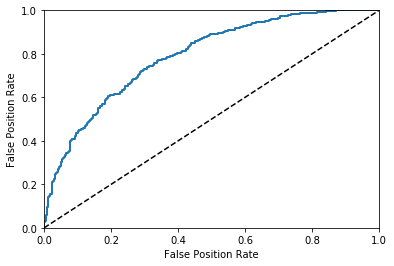

In [89]:
from sklearn.metrics import roc_curve

fpr,tpr,thresholds = roc_curve(y_test,y_pred_scores)
plot_roc_curve(fpr,tpr)

### SVM

In [103]:
from sklearn.svm import SVC

# 暂时使用linear
# param_distributions = {'C':uniform(0,10)}
# rscv_svc = RandomizedSearchCV(SVC(), param_distributions=param_distributions,cv=3,n_iter=500, verbose=2)
# rscv_svc.fit(x_train_scaler, y_train)

In [102]:
# svc = rscv_svc.best_estimator_
# print(svc)
# 由于电脑训练太慢，采用RandomizedSearchCV得到是C = 1.0230985066016718,下面直接使用
svc = SVC(C=1.0230985066016718)
svc.fit(x_train_scaler, y_train)
y_pred = svc.predict(x_test_scaler)
y_pred_scores = cross_val_predict(svc,x_test_scaler,y_test,cv=5,
                                method='decision_function')
print('accuracy_score:', accuracy_score(y_test,y_pred))
print('precision_score:', precision_score(y_test,y_pred))
print('recall_score:', recall_score(y_test,y_pred))
print('f1_score:', f1_score(y_test,y_pred))
print('roc_auc_score:', roc_auc_score(y_test,y_pred_scores))

C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 

accuracy_score: 0.7943156320119671
precision_score: 0.7058823529411765
recall_score: 0.25925925925925924
f1_score: 0.3792325056433408
roc_auc_score: 0.7604048602732381


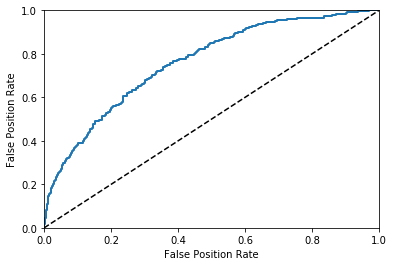

In [93]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred_scores)
plot_roc_curve(fpr,tpr)

### DecisionTree

In [105]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
dt_clf.fit(x_train_scaler,y_train)
y_pred = dt_clf.predict(x_test_scaler)
y_pred_scores = cross_val_predict(dt_clf,x_test_scaler,y_test,cv=5,
                                method='predict_proba')
print('accuracy_score:', accuracy_score(y_test,y_pred))
print('precision_score:', precision_score(y_test,y_pred))
print('recall_score:', recall_score(y_test,y_pred))
print('f1_score:', f1_score(y_test,y_pred))
print('roc_auc_score:', roc_auc_score(y_test,y_pred_scores[:,1]))

accuracy_score: 0.6925953627524308
precision_score: 0.37815126050420167
recall_score: 0.4166666666666667
f1_score: 0.3964757709251101
roc_auc_score: 0.5632639879102531


[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [1. 0.]
 [0. 1.]]


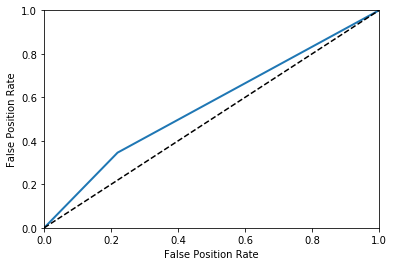

In [110]:
print(y_pred_scores)
fpr,tpr,thresholds = roc_curve(y_test,y_pred_scores[:,1])
plot_roc_curve(fpr,tpr)